Le notebook présentation suit les demandes du mail:

_Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)

_Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

_Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)

_Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

# Imports et Fonctions

# Cadre de l'étude:

Ceci est une étude exploratoire du jeu de donnée. N'ayant pas d'entreprise particulière avec qui échanger, j'ai choisi de pratiquer une approche naïve de l'étude en me basant simplement sur la silhouette type de la boîte étudiée: <br/>
C'est une boîte dans l'éducation, plutôt orientée (fin lycée+supérieur) qui cherche l'expansion à l'international.
Je ne sais pas qui sont ses clients cibles, ses attentes, ses critères de sélection, ses capacités de persuasion et sur quel pulation, etc d'où l'approche naïve.

In [4]:
#Initialisation: 
#import des librairies et des données
#déclaration de fonctions
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter
from scipy.integrate import simps
import missingno as msno

###############################################################################################################################

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

path_data = "C:/Users/Anwender/Desktop/openclassroom/projet_2/data/EdStatsData.csv"
data = pd.read_csv(path_data,sep=',', header=0)
data.name = "data"

path_data = "C:/Users/Anwender/Desktop/openclassroom/projet_2/data/EdStatsCountry.csv"
data_country = pd.read_csv(path_data,sep=',', header=0)
data_country.name = "data_country"

path_data = "C:/Users/Anwender/Desktop/openclassroom/projet_2/data/EdStatsCountry-Series.csv"
data_country_s = pd.read_csv(path_data,sep=',', header=0)
data_country_s.name = "data_country_s"

path_data = "C:/Users/Anwender/Desktop/openclassroom/projet_2/data/EdStatsFootNote.csv"
data_footnote = pd.read_csv(path_data,sep=',', header=0)
data_footnote.name = "data_footnote"

path_data = "C:/Users/Anwender/Desktop/openclassroom/projet_2/data/EdStatsSeries.csv"
data_series = pd.read_csv(path_data,sep=',', header=0)
data_series.name = "data_series"

###############################################################################################################################

def country_to_region(x):
    if pd.isna(x['Region']):
        return x['Country Name']
    else:
        return x['Region']

###############################################################################################################################
    
def verif_dupl(d):
    k = (d.iloc[:,0].size)-(d.drop_duplicates().iloc[:,0].size)
    if k==0:
        remarque_duplicate = "Pas de doublons dans "+d.name
    else:
        remarque_duplicate = "Il y a "+str(k)+" doublons dans "+d.name   
    print(remarque_duplicate)

###############################################################################################################################

def info_size(d):
    print(d.name+" comporte " +str(d.index.size)+" lignes pour "+str(d.columns.size)+" colonnes")

###############################################################################################################################
    
def key_gestion(d):
    indic_key = ["15-19", "24", "25", "28", "29", "teacher", "internet"]
#     indic_key = ["15-19", "24"]
    #indic_key = ["teacher"] #avec ces indic on peut étudier le coût des professeur et comparer le coût d'une de nos formations et être force d eproposition
    less_key = ["male", "female", "Male", "Female"]
    indic_list = []
    for indicator in d["Indicator Name"].unique():
        if any(word in str(indicator) for word in indic_key):
            if any(word in str(indicator) for word in less_key):
                pass
            else:
                print(indicator)
                print("\n")

###############################################################################################################################
                
def recup_last(d):
   return(d[d.last_valid_index()])

###############################################################################################################################

def AUC(d):
    k=d.dropna()
    return(simps(k, dx=5))

###############################################################################################################################

def score_that_country_please(d, l_pop, l_eqpmt):
    if d[d["Indicator Code"].isin(l_pop)]["AUC"].size > 0:
        P = d[d["Indicator Code"].isin(l_pop)]["AUC"].sum()
    else:
        P = 1
    if d[d["Indicator Code"].isin(l_eqpmt[1:3])]["last value"].size > 0:
        E = d[d["Indicator Code"].isin(l_eqpmt[1:3])]["last value"].min()
    else:
        E = 1
    if d[d["Indicator Code"].isin(l_eqpmt[0:1])]["last value"].size > 0:
        G = d[d["Indicator Code"].isin(l_eqpmt[0:1])]["last value"].values[0]
    else:
        G = 1
    if P*E*G in [-1, 0, 1]:
        return(1)
    else:
        return(np.log(P*E*G))

###############################################################################################################################
    
def score_that_country_please_zero(d, l_pop, l_eqpmt, P, E, G):
    if d[d["Indicator Code"].isin(l_pop)]["AUC"].size > 0:
        P = d[d["Indicator Code"].isin(l_pop)]["AUC"].sum()
    else:
        pass
    if d[d["Indicator Code"].isin(l_eqpmt[1:3])]["last value"].size > 0:
        E = d[d["Indicator Code"].isin(l_eqpmt[1:3])]["last value"].min()
    else:
        pass
    if d[d["Indicator Code"].isin(l_eqpmt[0:1])]["last value"].size > 0:
        G = d[d["Indicator Code"].isin(l_eqpmt[0:1])]["last value"].values[0]
    else:
        pass
    if P*E*G in [-1, 0, 1]:
        return(0)
    else:
        return(np.log(P*E*G))

###############################################################################################################################

def score_that_region_please(d, l_pop, l_eqpmt):
    if d[d["Indicator Code"].isin(l_pop)]["AUC"].size > 0:
        P = d[d["Indicator Code"].isin(l_pop)]["AUC"].sum()
    else:
        P = 1
    if d[d["Indicator Code"].isin(l_eqpmt[1:3])]["last value"].size > 0:
        E_1 = d[d["Indicator Code"]==l_eqpmt[1]]["last value"].mean()
        E_2 = d[d["Indicator Code"]==l_eqpmt[2]]["last value"].mean()
        E = min(E_1, E_2)
#         E=E_2
    else:
        E = 1
    if d[d["Indicator Code"]==l_eqpmt[0]]["last value"].size > 0:
        G = d[d["Indicator Code"]==l_eqpmt[0]]["last value"].mean()
    else:
        G = 1
    if P*E*G in [-1, 0, 1]:
        return(1)
    else:
        return(np.log(P*E*G))

###############################################################################################################################
    
def score_that_region_please_zero(d, l_pop, l_eqpmt):
    if d[d["Indicator Code"].isin(l_pop)]["AUC"].size > 0:
        P = d[d["Indicator Code"].isin(l_pop)]["AUC"].sum()
    else:
        P = 0
    if d[d["Indicator Code"].isin(l_eqpmt[1:3])]["last value"].size > 0:
        E_1 = d[d["Indicator Code"]==l_eqpmt[1]]["last value"].mean()
        E_2 = d[d["Indicator Code"]==l_eqpmt[2]]["last value"].mean()
        E = min(E_1, E_2)
#         E=E_2
    else:
        E = 0
    if d[d["Indicator Code"]==l_eqpmt[0]]["last value"].size > 0:
        G = d[d["Indicator Code"]==l_eqpmt[0]]["last value"].mean()
    else:
        G = 0
    if P*E*G in [-1, 0, 1]:
        return(0)
    else:
        return(np.log(P*E*G))

###############################################################################################################################
    
def petit_resume_svp(d, region, indic, d2):
    l = ["Median","Var","Std","Skew","Kurtosis"]
    resumed  = "\nDans la région "+str(region)+" l'indicateur "+str(indic)+" a pour valeur médiane "+str(round(d.loc[region, indic]["Median"],2))
    
    resumed += ".\nMais aussi un ecart-type de "+str(round(d.loc[region, indic]["Std"],2))
    
    resumed += ".\nSon skewness "+str(round(d.loc[region, indic]["Skew"],2))
    if d.loc[region, indic]["Skew"]>(0.1):
        resumed += " indique que la distribution est plutôt étalée à droite"
    elif d.loc[region, indic]["Skew"]<(-0.1):
        resumed += " indique que distribution est plutôt étalée à gauche"
    else:
        resumed += " indique que la distribution est plutôt symétrique"
        
    resumed += ".\nEnfin son kurtosis "+str(round(d.loc[region, indic]["Kurtosis"],2))
    if d.loc[region, indic]["Kurtosis"]>(0.2):
        resumed += " indique que sa distribution est moins aplatie que la distribution normale : les observations sont plus concentrées."
    elif d.loc[region, indic]["Kurtosis"]<(-0.2):
        resumed += " indique que les observations sont moins concentrées : la distribution est plus aplatie."
    else:
        resumed += " indique que la distribution a le même aplatissement que la distribution normale."
    print(resumed)
    
    d_boxplot = df_1[df_1["Region"]==region]
    d_boxplot = d_boxplot[d_boxplot["Indicator Code"]==indic]
    d_boxplot = d_boxplot.iloc[:,4:68].dropna(axis=1).mean(axis=0)
    if d_boxplot.size >1:
        print("En voici une petite boîte à moustache:")
        plt.boxplot(d_boxplot)
        plt.title(str(indic)+" in "+str(region))
        plt.show()

# Dataset classique avec join sur les régions

In [10]:
#version simple de la donnée à étudier

###############################################################################################################################
df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1=df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
df_1.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+00,2.150000e+00,9.332923e+00,

# Descriptif des jeux de donnée

In [9]:
#1&2 Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
# Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

###############################################################################################################################
l = [data, data_country, data_country_s, data_footnote, data_series]
for i in l:
    verif_dupl(i)
    info_size(i)
    print("")
del(l)
###############################################################################################################################

Pas de doublons dans data
data comporte 886930 lignes pour 70 colonnes

Pas de doublons dans data_country
data_country comporte 241 lignes pour 32 colonnes

Pas de doublons dans data_country_s
data_country_s comporte 613 lignes pour 4 colonnes

Pas de doublons dans data_footnote
data_footnote comporte 643638 lignes pour 5 colonnes

Pas de doublons dans data_series
data_series comporte 3665 lignes pour 21 colonnes



    
## Résumé: 
Pas de doublons sur les jeux de donnée et des tailles différentes avec des variables communes

# Types de données

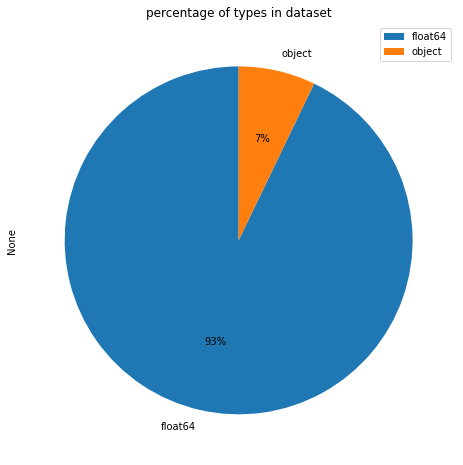

In [19]:
plt.figure(figsize=(8,8))
plt.title("percentage of types in dataset")
df_1.dtypes.value_counts().plot.pie(autopct='%1.0f%%', startangle=90)
plt.legend(loc = "best")
#On a une majorité de données numériques et quelques strings

# Heatmap des valeurs manquantes avant nettoyage

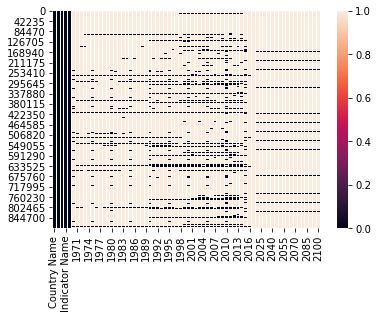

In [11]:
sns.heatmap(df_1.isna())

# Données globales

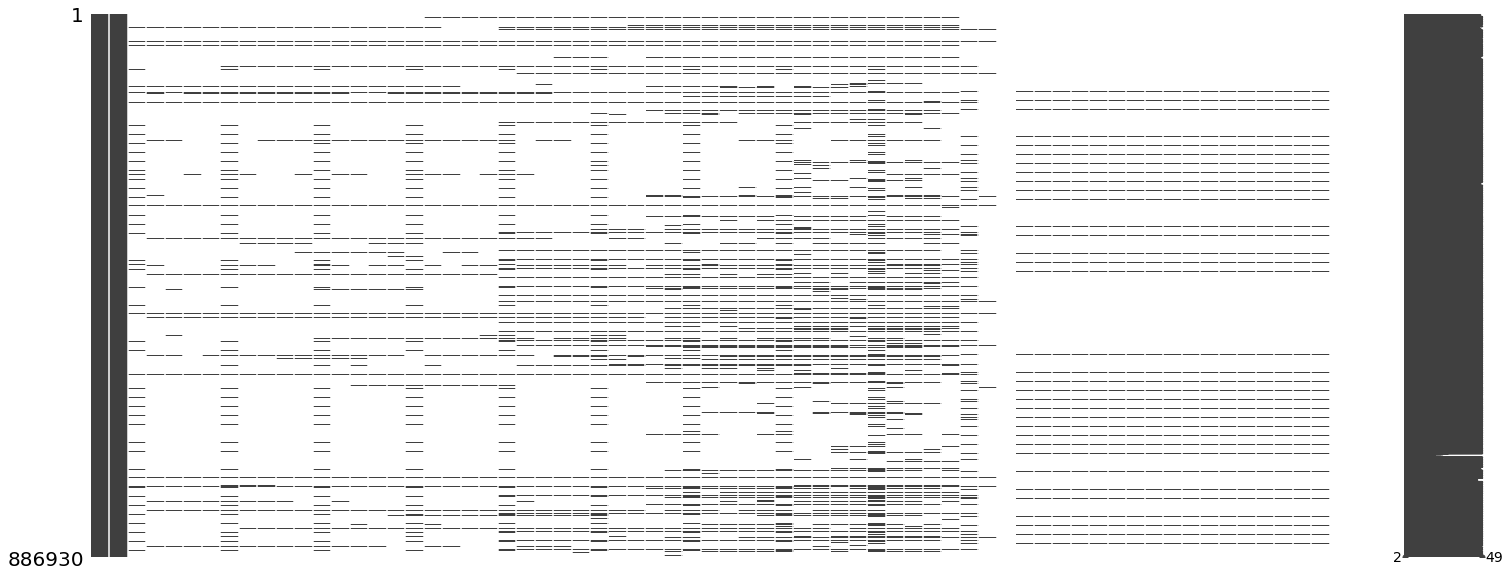

In [11]:
#Voici les données présentes avant sélection des indicateurs
df_2 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_2=df_2.join(data.iloc[:,2:])
df_2["Region"] = df_2.apply(lambda x : country_to_region(x),axis=1)
msno.matrix(df_2.iloc[:,3:])

# Résumé:
 _Les bandes noires sont les variables indicatrices (indicator code, country name) mis à part la dernière qui est "unnamed"<br/>
 _le bloc de gauche très disparatre avec deux parties:<br/>
     _jusqu'aux années 95+: peu de donnée.<br/>
     _après 95+: de plus en plus de donnée<br/>
 Sur l'ensemble de ce bloc on a des pics de donnée tous les 5ans, que je suppose être basé sur la méthode d'étude.<br/>
 _le bloc à droite: les prédictions qui sont faites à intervalles de 5ans sur des indicateur précis.<br/>
 Ce sont des données régulières

In [20]:
l_missing_data = (df_1.isna().sum(axis=1)/df_1.shape[1]).sort_values(ascending=False)
print(l_missing_data[0])
print(l_missing_data[-1:])

0.9285714285714286
384145    0.257143
dtype: float64


# Analyse des données manquantes par région avant nettoyage

-2


Moyenne de données manquantes par régions:96.28035714285714
Minimum de données manquantes par régions:91.25


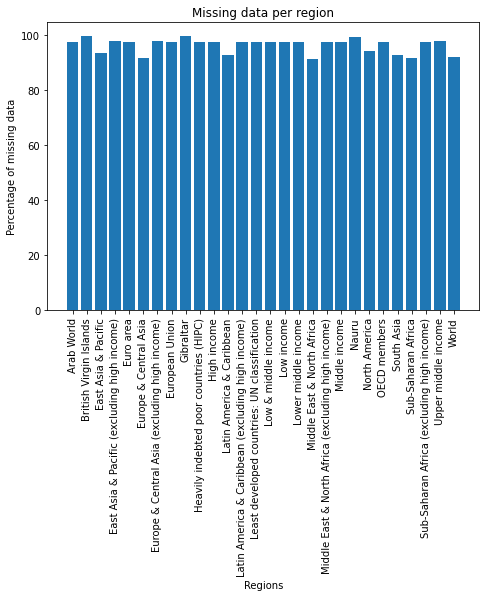

In [59]:
#Ici une première analyse des données manquantes par région 
#1 Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
def missing_discrete(d):
    k = d.iloc[:, 4:].isna().sum()
    print("Dans "+ d.name+" il y a " + str(k.values.sum())+ " données manquantes sur "+ str(d.iloc[:, 4:].size) + " au total, soit près de "+str(round(100*k.values.sum()/d.iloc[:, 4:].size,2)) +"% de la donnée")

def missing_percentage(d, name):
#     print("Dans "+ name+" il y a " + str(round(100-d.mean(axis=1).values.mean(),2))+"% de données manquante")
    return(round(100-d.mean(axis=1).values.mean(),2))

def missing_value_per_period(df, start, end):
    #on définit la surface d'étude: année de début et de fin et on compte les nan sur ces années
    k = df.iloc[:, start:end].notna().sum(axis=1)
    #on fait la moyenne des values existantes sur la période
#     l = pd.DataFrame(100*k/(df.iloc[0,start:end].size), columns=[str(2020+start)+str("-")+str(2020+end)])
    l = pd.DataFrame(100*k/(df.iloc[0,start:end].size), columns=[str(df.columns.values[start])+str("-")+str(df.columns.values[end])])
    #on join les indicateurs du dataset aux moyennes de donnée présentes puis on jette les variables inutiles au calcul
    df_mean_na = df.iloc[:,0:5].join(l)
    df_mean_na = df_mean_na.drop(["Country Code", "Country Name", "Indicator Code"], axis=1)
    #on regroupe le tout par région et par indicateur
    k = df_mean_na.groupby(["Region", "Indicator Name"])[str(df.columns.values[start])+str("-")+str(df.columns.values[end])].mean()
    del df_mean_na
    return(k)    

###############################################################################################################################

df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1=df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
periods = [*range(-65, -16, 5)]+[*range(-16, -1, 1)]
l = []
for i in range(len(periods)):
    if i!=(len(periods)-1):
        l.append(missing_value_per_period(df_1, periods[i], periods[i+1]))
    else:
        print(periods[i])
        l.append(missing_value_per_period(df_1, periods[i], -1))

###############################################################################################################################

to_graph = pd.DataFrame(l).transpose()
#to_graph = to_graph[to_graph.iloc[:,:].sum(axis=1)>0] #à commenter décommenter pour avoir ou non les lignes sans donnée
dico_region = {}
for region in to_graph.index.get_level_values(0).unique():
    dico_region[region] = to_graph.loc[region]

new_l=[]
# missing_discrete(data)
print("\n")
for i in dico_region.keys():
    dico_region[i].name = i
    new_l.append(missing_percentage(dico_region[i].iloc[:,:], i))
#     print("\n")    

print("Moyenne de données manquantes par régions:"+str(np.mean(new_l)))
print("Minimum de données manquantes par régions:"+str(np.min(new_l)))

###############################################################################################################################

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Missing data per region")
ax.set_ylabel("Percentage of missing data")  
ax.set_xlabel("Regions")
ax.bar(dico_region.keys(),new_l)
plt.xticks(rotation=90)
plt.show()
# ax.savefig("Missing data per region", bbox_inches='tight')


# Résumé: 
 Il y a beaucoup de données manquantes sur l'ensemble du jeu de donnée principal.<br/>
 Le minimum de donnée manquante d'une région est de 91.2%<br/>
 On peut expliquer cela par:<br/>
 Toutes les pays ont accès à tous les indicateurs et années d'étude sans pour autant y avoir de donnée/d'étude réalisée.<br/>

# Données manquantes après nettoyage

-2


Moyenne de données manquantes par régions:70.95400000000001
Minimum de données manquantes par régions:49.77


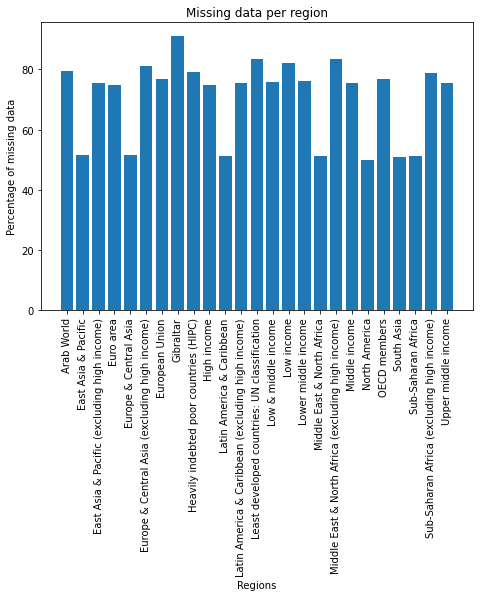

<Figure size 432x288 with 0 Axes>

In [2]:
#Ici une première analyse des données manquantes par région 
#1 Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
def missing_discrete(d):
    k = d.iloc[:, 4:].isna().sum()
    print("Dans "+ d.name+" il y a " + str(k.values.sum())+ " données manquantes sur "+ str(d.iloc[:, 4:].size) + " au total, soit près de "+str(round(100*k.values.sum()/d.iloc[:, 4:].size,2)) +"% de la donnée")

def missing_percentage(d, name):
#     print("Dans "+ name+" il y a " + str(round(100-d.mean(axis=1).values.mean(),2))+"% de données manquante")
    return(round(100-d.mean(axis=1).values.mean(),2))

def missing_value_per_period(df, start, end):
    #on définit la surface d'étude: année de début et de fin et on compte les nan sur ces années
    k = df.iloc[:, start:end].notna().sum(axis=1)
    #on fait la moyenne des values existantes sur la période
#     l = pd.DataFrame(100*k/(df.iloc[0,start:end].size), columns=[str(2020+start)+str("-")+str(2020+end)])
    l = pd.DataFrame(100*k/(df.iloc[0,start:end].size), columns=[str(df.columns.values[start])+str("-")+str(df.columns.values[end])])
    #on join les indicateurs du dataset aux moyennes de donnée présentes puis on jette les variables inutiles au calcul
    df_mean_na = df.iloc[:,0:5].join(l)
    df_mean_na = df_mean_na.drop(["Country Code", "Country Name"], axis=1)
    #on regroupe le tout par région et par indicateur
    k = df_mean_na.groupby(["Region", "Indicator Code"])[str(df.columns.values[start])+str("-")+str(df.columns.values[end])].mean()
    del df_mean_na
    return(k)    
###############################################################################################################################

l_int=['NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2']
l_15_19=["PRJ.POP.1519.2.MF", "PRJ.POP.1519.4.MF","PRJ.POP.1519.3.MF"]
l_20_24=["PRJ.POP.2024.2.MF", "PRJ.POP.2024.4.MF", "PRJ.POP.2024.3.MF"]
l_temp = l_15_19 + l_20_24
l_tot = l_int+ l_15_19+ l_20_24

###############################################################################################################################

df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1=df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
#Maintenant que nous avons les indicateurs que nous voulons nous pouvons conserver uniquement leur codes
df_1 = df_1.drop(columns="Indicator Name")
#On peut aussi drop la région world qui est un peu large
df_1 = df_1.drop(df_1[df_1["Country Name"]=="World"].index)
#Puis on peut conserver uniquement les indicateurs qui nous intéressent
df_1 = df_1[df_1["Indicator Code"].isin(l_tot)]
#Et enfin drop les colonnes totalement vides
df_1 = df_1[df_1.iloc[:,4:].notna().sum(axis=1)>0]

###############################################################################################################################

periods = [*range(-65, -16, 5)]+[*range(-16, -1, 1)]
l = []
for i in range(len(periods)):
    if i!=(len(periods)-1):
        l.append(missing_value_per_period(df_1, periods[i], periods[i+1]))
    else:
        print(periods[i])
        l.append(missing_value_per_period(df_1, periods[i], -1))

to_graph = pd.DataFrame(l).transpose()
#to_graph = to_graph[to_graph.iloc[:,:].sum(axis=1)>0] #à commenter décommenter pour avoir ou non les lignes sans donnée
dico_region = {}
for region in to_graph.index.get_level_values(0).unique():
    dico_region[region] = to_graph.loc[region]

new_l=[]
# missing_discrete(data)
print("\n")
for i in dico_region.keys():
    dico_region[i].name = i
    new_l.append(missing_percentage(dico_region[i].iloc[:,:], i))
#     print("\n")    

###############################################################################################################################

print("Moyenne de données manquantes par régions:"+str(np.mean(new_l)))
print("Minimum de données manquantes par régions:"+str(np.min(new_l)))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Missing data per region")
ax.set_ylabel("Percentage of missing data")  
ax.set_xlabel("Regions")
ax.bar(dico_region.keys(),new_l)
plt.xticks(rotation=90)
plt.show()
plt.savefig("Missing data per region post cleaning", bbox_inches='tight')


# Résumé: 
 Il y a moins de données manquantes sur l'ensemble du jeu de donnée principal.<br/>
 Le minimum de donnée manquante d'une région est de 49.8%<br/>
 On peut expliquer cela par:<br/>
 L'acccès aux même années alors que les études n'ont pas la même période d'application (prédiction:2020-2100, le reste 1970-2020)

# Analyse des données manquantes par pays avant nettoyage

-2


Moyenne de données manquantes par pays:92.63338842975206
Minimum de données manquantes par pays:88.45


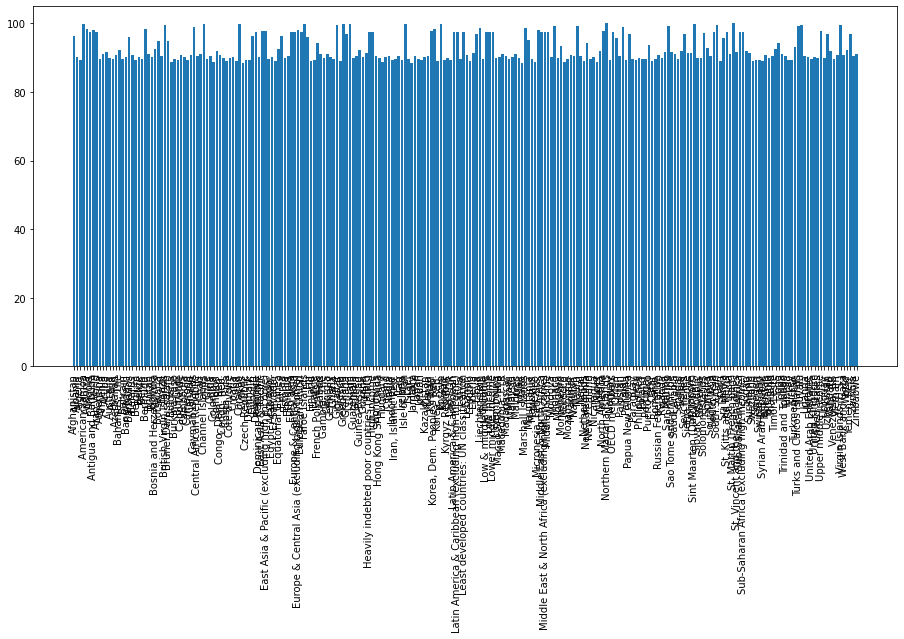

In [53]:
#Ici une première analyse des données manquantes par région 
#1 Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
def missing_discrete(d):
    k = d.iloc[:, 4:].isna().sum()
    print("Dans "+ d.name+" il y a " + str(k.values.sum())+ " données manquantes sur "+ str(d.iloc[:, 4:].size) + " au total, soit près de "+str(round(100*k.values.sum()/d.iloc[:, 4:].size,2)) +"% de la donnée")

def missing_percentage(d, name):
#     print("Dans "+ name+" il y a " + str(round(100-d.mean(axis=1).values.mean(),2))+"% de données manquante")
    return(round(100-d.mean(axis=1).values.mean(),2))

def missing_value_per_period(df, start, end):
    #on définit la surface d'étude: année de début et de fin et on compte les nan sur ces années
    k = df.iloc[:, start:end].notna().sum(axis=1)
    #on fait la moyenne des values existantes sur la période
#     l = pd.DataFrame(100*k/(df.iloc[0,start:end].size), columns=[str(2020+start)+str("-")+str(2020+end)])
    l = pd.DataFrame(100*k/(df.iloc[0,start:end].size), columns=[str(df.columns.values[start])+str("-")+str(df.columns.values[end])])
    #on join les indicateurs du dataset aux moyennes de donnée présentes puis on jette les variables inutiles au calcul
    df_mean_na = df.iloc[:,0:5].join(l)
    df_mean_na = df_mean_na.drop(["Country Code", "Region", "Indicator Code"], axis=1)
    #on regroupe le tout par région et par indicateur
    k = df_mean_na.groupby(["Country Name", "Indicator Name"])[str(df.columns.values[start])+str("-")+str(df.columns.values[end])].mean()
    del df_mean_na
    return(k)    

###############################################################################################################################

df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1=df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
periods = [*range(-65, -16, 5)]+[*range(-16, -1, 1)]
l = []
for i in range(len(periods)):
    if i!=(len(periods)-1):
        l.append(missing_value_per_period(df_1, periods[i], periods[i+1]))
    else:
        print(periods[i])
        l.append(missing_value_per_period(df_1, periods[i], -1))

to_graph = pd.DataFrame(l).transpose()
#to_graph = to_graph[to_graph.iloc[:,:].sum(axis=1)>0] #à commenter décommenter pour avoir ou non les lignes sans donnée
dico_region = {}
for country in to_graph.index.get_level_values(0).unique():
    dico_region[country] = to_graph.loc[country]

new_l=[]
# missing_discrete(data)
print("\n")
for i in dico_region.keys():
    dico_region[i].name = i
    new_l.append(missing_percentage(dico_region[i].iloc[:,:], i))
#     print("\n")    

###############################################################################################################################

print("Moyenne de données manquantes par pays:"+str(np.mean(new_l)))
print("Minimum de données manquantes par pays:"+str(np.min(new_l)))
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(dico_region.keys(),new_l)
plt.xticks(rotation=90)
plt.show()


# Résumé: 
 Il y a beaucoup de données manquantes sur l'ensemble du jeu de donnée principal.<br/>
 Le minimum de donnée manquante d'une région est de 88.45%<br/>
 On peut expliquer cela par:<br/>
 Toutes les pays ont accès à tous les indicateurs et années d'étude sans pour autant y avoir de donnée/d'étude réalisée.

# Données manquantes par pays après nettoyage

-2


Moyenne de données manquantes par pays:59.96792372881356
Minimum de données manquantes par pays:45.6


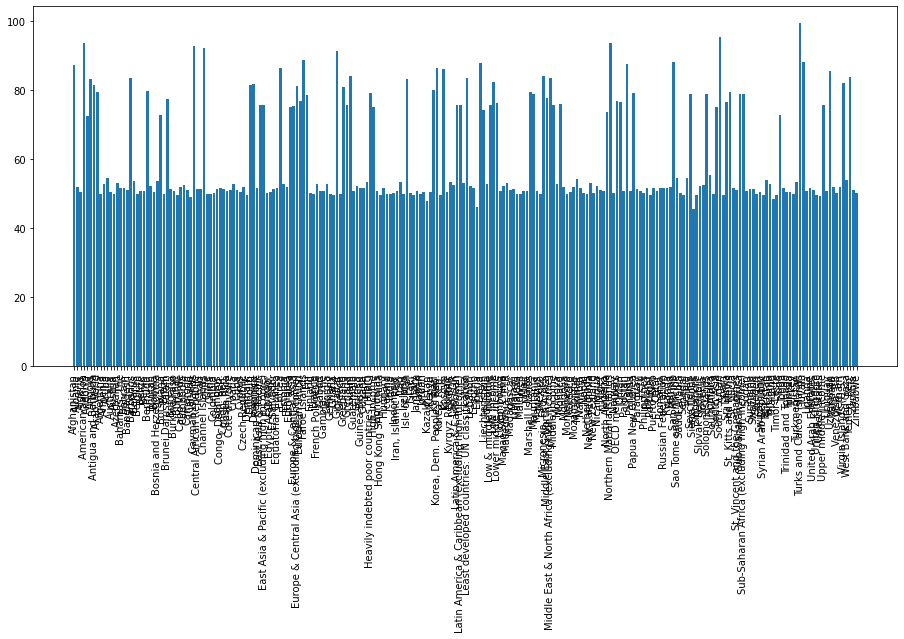

In [58]:
#Ici une première analyse des données manquantes par région 
#1 Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
def missing_discrete(d):
    k = d.iloc[:, 4:].isna().sum()
    print("Dans "+ d.name+" il y a " + str(k.values.sum())+ " données manquantes sur "+ str(d.iloc[:, 4:].size) + " au total, soit près de "+str(round(100*k.values.sum()/d.iloc[:, 4:].size,2)) +"% de la donnée")

def missing_percentage(d, name):
#     print("Dans "+ name+" il y a " + str(round(100-d.mean(axis=1).values.mean(),2))+"% de données manquante")
    return(round(100-d.mean(axis=1).values.mean(),2))

def missing_value_per_period(df, start, end):
    #on définit la surface d'étude: année de début et de fin et on compte les nan sur ces années
    k = df.iloc[:, start:end].notna().sum(axis=1)
    #on fait la moyenne des values existantes sur la période
#     l = pd.DataFrame(100*k/(df.iloc[0,start:end].size), columns=[str(2020+start)+str("-")+str(2020+end)])
    l = pd.DataFrame(100*k/(df.iloc[0,start:end].size), columns=[str(df.columns.values[start])+str("-")+str(df.columns.values[end])])
    #on join les indicateurs du dataset aux moyennes de donnée présentes puis on jette les variables inutiles au calcul
    df_mean_na = df.iloc[:,0:5].join(l)
    df_mean_na = df_mean_na.drop(["Country Code", "Region"], axis=1)
    #on regroupe le tout par région et par indicateur
    k = df_mean_na.groupby(["Country Name", "Indicator Code"])[str(df.columns.values[start])+str("-")+str(df.columns.values[end])].mean()
    del df_mean_na
    return(k)    

###############################################################################################################################

df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1=df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
#Maintenant que nous avons les indicateurs que nous voulons nous pouvons conserver uniquement leur codes
df_1 = df_1.drop(columns="Indicator Name")
#On peut aussi drop la région world qui est un peu large
df_1 = df_1.drop(df_1[df_1["Country Name"]=="World"].index)
#Puis on peut conserver uniquement les indicateurs qui nous intéressent
df_1 = df_1[df_1["Indicator Code"].isin(l_tot)]
#Et enfin drop les colonnes totalement vides
df_1 = df_1[df_1.iloc[:,4:].notna().sum(axis=1)>0]

###############################################################################################################################

periods = [*range(-65, -16, 5)]+[*range(-16, -1, 1)]
l = []
for i in range(len(periods)):
    if i!=(len(periods)-1):
        l.append(missing_value_per_period(df_1, periods[i], periods[i+1]))
    else:
        print(periods[i])
        l.append(missing_value_per_period(df_1, periods[i], -1))

to_graph = pd.DataFrame(l).transpose()
#to_graph = to_graph[to_graph.iloc[:,:].sum(axis=1)>0] #à commenter décommenter pour avoir ou non les lignes sans donnée
dico_region = {}
for country in to_graph.index.get_level_values(0).unique():
    dico_region[country] = to_graph.loc[country]

new_l=[]
# missing_discrete(data)
print("\n")
for i in dico_region.keys():
    dico_region[i].name = i
    new_l.append(missing_percentage(dico_region[i].iloc[:,:], i))
#     print("\n")    
###############################################################################################################################
#A refaire full dataframes
###############################################################################################################################

print("Moyenne de données manquantes par pays:"+str(np.mean(new_l)))
print("Minimum de données manquantes par pays:"+str(np.min(new_l)))
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(dico_region.keys(),new_l)
plt.xticks(rotation=90)
plt.show()


###############################################################################################################################

# new_lbis=[]
# n_dict = dict(filter(lambda x: missing_percentage(dico_region[x[0]].iloc[:,:], x[0])> np.mean(new_l), dico_region.items()))
# for i in dico_region.keys():
#     dico_region[i].name = i
#     new_lbis.append(missing_percentage(dico_region[i].iloc[:,:], i))
    
# fig = plt.figure(figsize=(12,5))
# ax = fig.add_axes([0,0,1,1])
# ax.bar(dico_region.keys(),new_lbis)
# plt.xticks(rotation=90)
# plt.show()  
    


# Résumé: 
 Il y a moins de données manquantes sur l'ensemble du jeu de donnée principal.<br/>
 Le minimum de donnée manquante d'une région est de 45.6%<br/>
 On peut expliquer cela par:<br/>
 L'acccès aux même années alors que les études n'ont pas la même période d'application (prédiction:2020-2100, le reste 1970-2020)

# Choix des indicateurs

In [5]:
#3 Sélectionner les informations qui semblent pertinentes pour répondre à la problématique 
# (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)

#A la recherche d'indicateurs
#je veux trouver des infos sur la capacité à être sur internet pour des cours à distance
#A la recherche d'ordinateur et d'internet

###############################################################################################################################

#on cherche dans data_series des mots clés lié au domaine
indic_key = ["internet", "computer", "distance", "visio", "equipment"]
indic_key_c = [x.capitalize() for x in indic_key] 
for indicator in data_series["Long definition"]:
    if any(word in str(indicator) for word in indic_key):
            print(indicator)
            print("\n")

###############################################################################################################################
            
#On trouve ces deux éléments intéressants et on en fait une liste            
l = ["Personal computers are self-contained computers designed to be used by a single individual.",
"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc. "]

Personal computers are self-contained computers designed to be used by a single individual.


Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.


Percentage of 6th grade students scoring at least 413.58 but lower than 514.41 points on the LLECE mathematics scale. At Level 2, students can 1) analyze and identify the structure of the positional decimal number system, estimate weight (mass) expressing it in units consistent with the attribute being measured; 2) recognize commonly used geometrical shapes and their properties in order to solve problems; 3) interpret, compare and work with information presented through various graphic images; 4) identify the regularity of a simple pattern sequence; 5) solve addition problems in different numerical fields (natural numbers, decimals) including commonly used fractions or equivalent m

### 3 La liste d'indicateurs que je trouve intéressants que ce soit pour une entreprise ou une analyse de la population
l_int= ["Personal computers (per 100 people)", "Internet users (per 100 people)", "GDP per capita (current US$)"]
l_15_19 = ["Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary",
"Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary",
"Barro-Lee: Population in thousands, age 15-19, total"]

l_20_24 = ["Barro-Lee: Population in thousands, age 20-24, total",
"Barro-Lee: Percentage of population age 20-24 with primary schooling. Completed Primary",
"Barro-Lee: Percentage of population age 20-24 with primary schooling. Total (Incomplete and Completed Primary)",
"Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary",
"Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)",
"Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary",
"Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)"]


    
Barro-Lee: Percentage of population age 25+ with tertiary schooling. Completed Tertiary
Barro-Lee: Percentage of population age 25+ with tertiary schooling. Total (Incomplete and Completed Tertiary)
    
l_wig = ["Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total",
"Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total"]
Barro-Lee: Population in thousands, age 25+, total
Barro-Lee: Population in thousands, age 25-29, total

l_pt_ratio = ["Pupil-teacher ratio in primary education (headcount basis)",
"Pupil-teacher ratio in secondary education (headcount basis)",
"Pupil-teacher ratio in tertiary education (headcount basis)"]
    
l_wig_meany = ["Wittgenstein Projection: Mean years of schooling. Age 15-19. Total",
"Wittgenstein Projection: Mean years of schooling. Age 20-24. Total",
"Wittgenstein Projection: Mean years of schooling. Age 25-29. Total"]
    
l_wig_highedu = ["Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total",
"Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Post Secondary. Total",
"Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total",
"Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Post Secondary. Total"]      

l = ["Barro-Lee: Population in thousands, age 15-19, total",
"Barro-Lee: Population in thousands, age 20-24, total",
"Barro-Lee: Percentage of population age 15-19 with primary schooling. Completed Primary",
"Barro-Lee: Percentage of population age 20-24 with primary schooling. Completed Primary",
"Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary",
"Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary",
"Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary",
"Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary"]

l = ["Projection: Percentage of the population age 15-19 by highest level of educational attainment. Primary. Total",
"Projection: Percentage of the population age 15-19 by highest level of educational attainment. Lower Secondary. Total",
"Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total",
"Projection: Percentage of the population age 15-19 by highest level of educational attainment. Post Secondary. Total",
"Projection: Percentage of the population age 15-19 by highest level of educational attainment. No Education. Total",
"Projection: Percentage of the population age 15-19 by highest level of educational attainment. Incomplete Primary. Total",
"Projection: Percentage of the population age 20-24 by highest level of educational attainment. Primary. Total",
"Projection: Percentage of the population age 20-24 by highest level of educational attainment. Lower Secondary. Total",
"Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total",
"Projection: Percentage of the population age 20-24 by highest level of educational attainment. Post Secondary. Total",
"Projection: Percentage of the population age 20-24 by highest level of educational attainment. No Education. Total",
"Projection: Percentage of the population age 20-24 by highest level of educational attainment. Incomplete Primary. Total",
"Projection: Mean years of schooling. Age 15-19. Total",
"Projection: Mean years of schooling. Age 20-24. Total",
"Projection: Population age 15-19 in thousands by highest level of educational attainment. Primary. Total",
"Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total",
"Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total",
"Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total",
"Projection: Population age 15-19 in thousands by highest level of educational attainment. No Education. Total",
"Projection: Population age 15-19 in thousands by highest level of educational attainment. Incomplete Primary. Total",
"Projection: Population age 20-24 in thousands by highest level of educational attainment. Primary. Total",
"Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total",
"Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total",
"Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total",
"Projection: Population age 20-24 in thousands by highest level of educational attainment. No Education. Total",
"Projection: Population age 20-24 in thousands by highest level of educational attainment. Incomplete Primary. Total"]

"Percentage of population age 15-19 with no education"
"Percentage of population age 20-24 with no education"
"Population in thousands, 15-19, total is the total population of 15-19 year olds in thousands estimated by Barro-Lee."
"Population in thousands, 20-24, total is the total population of 20-24 year olds in thousands estimated by Barro-Lee."
"Percentage of population age 15-19 with primary schooling. Completed Primary"
"Percentage of population age 20-24 with primary schooling. Completed Primary"
"Percentage of population age 15-19 with secondary schooling. Completed Secondary"
"Percentage of population age 20-24 with secondary schooling. Completed Secondary"
"Percentage of population age 15-19 with tertiary schooling. Completed Tertiary"
"Percentage of population age 20-24 with tertiary schooling. Completed Tertiary"

"Average years of schooling by age group. Age 15-19. Quintile 5 is the number of years of formal schooling received, on average, by the quintile 5 population of the given age group. Each poverty quintile represents one fifth of students with quintile 1 being the poorest 20 percent of students and quintile 5 being the richest 20 percent of students."
#variable intéressante si on arrive à prouver que l'éducation coute chère dans ce pays et que l'on peut fournir une éducation moins chère



## 3 Maintenant si je ne devais garder que quelques uns de ces indicateurs je prendrais:

#### des données sur le wealth state des habitants, leur valeur financière, leurs capacités à être connecté à internet et à avoir du matériel pour les cours
l_int= ["Personal computers (per 100 people)", "Internet users (per 100 people)", "GDP per capita (current US$)"]

lint=['NY.GDP.PCAP.CD' (gdp per capita), 'IT.NET.USER.P2' (net user/100p), 'IT.CMP.PCMP.P2' (personnal computer/100p)]

#### des données sur les élèves qui seront encore en phase de formation/éducation sur les années à venir
#### Je pourrais compléter l'information avec le taux de poursuite d'études après les secondaire
les 15-19 <br/>
l_15_19 = ["Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total",
"Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total",
"Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total"]

l1519 = [PRJ.POP.1519.2.MF(Lower Secondary), PRJ.POP.1519.4.MF (post secondary),PRJ.POP.1519.3.MF (upper secondary)]

les 20-24
l_20_24 = ["Projection: Population age 20-24 in thousands by highest level of educational attainment. Lower Secondary. Total",
"Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total",
"Projection: Population age 20-24 in thousands by highest level of educational attainment. Post Secondary. Total"]

l2024=[PRJ.POP.2024.2.MF (lower secondary), PRJ.POP.2024.4.MF (post secondary), PRJ.POP.2024.3.MF (upper secondary)]

# Données globales après sélection des indicateurs

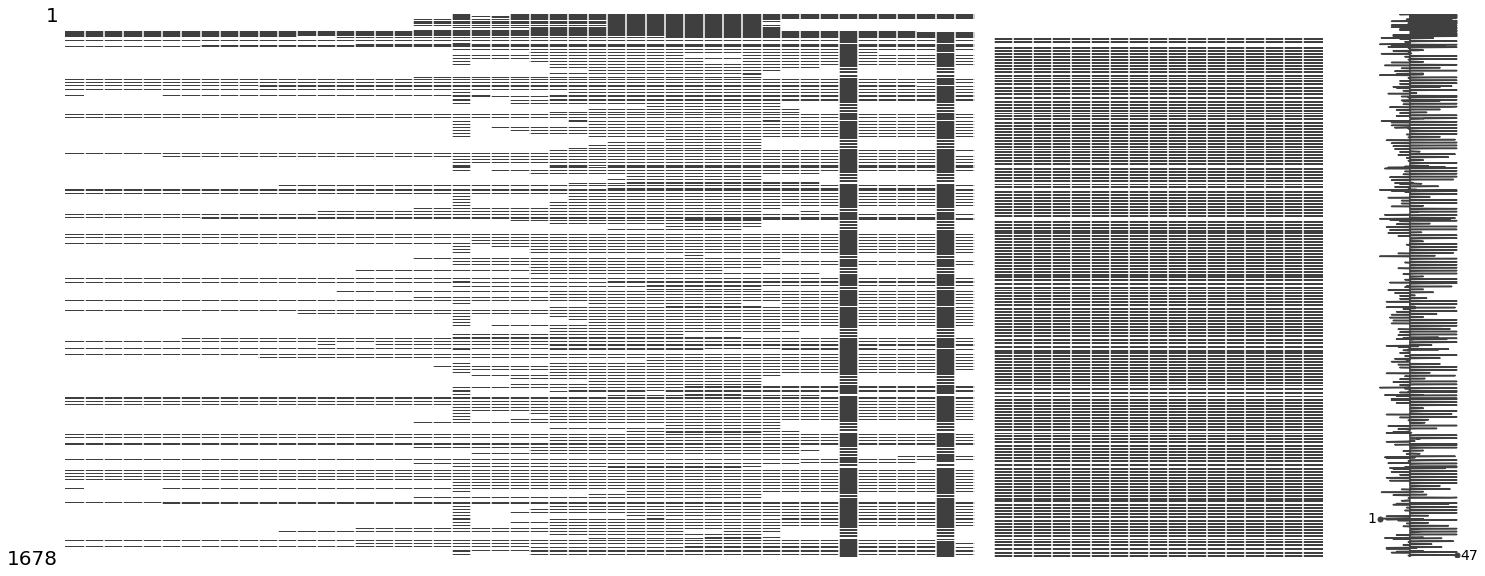

In [20]:
l_int=['NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2']
l_15_19=["PRJ.POP.1519.2.MF", "PRJ.POP.1519.4.MF","PRJ.POP.1519.3.MF"]
l_20_24=["PRJ.POP.2024.2.MF", "PRJ.POP.2024.4.MF", "PRJ.POP.2024.3.MF"]
l_temp = l_15_19 + l_20_24
l_tot = l_int+ l_15_19+ l_20_24

###############################################################################################################################

#On nettoie la donnée tout d'abord
#Je devrais aussi faire un nettoyage par indicateur avec drop d'indicateurs projection
#n'ayant pas de valeur sur les années>=2020 par exemple
df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]], 
                left_on="Country Code", right_on="Country Code", how="left")
df_1=df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
#Maintenant que nous avons les indicateurs que nous voulons nous pouvons conserver 
#uniquement leur codes
df_1 = df_1.drop(columns="Indicator Name")
#On peut aussi drop la région world qui est un peu large
df_1 = df_1.drop(df_1[df_1["Country Name"]=="World"].index)
#Puis on peut conserver uniquement les indicateurs qui nous intéressent
df_1 = df_1[df_1["Indicator Code"].isin(l_tot)]
#Et enfin drop les colonnes totalement vides
df_1 = df_1[df_1.iloc[:,4:].notna().sum(axis=1)>0]
msno.matrix(df_1.iloc[:,4:])

###############################################################################################################################



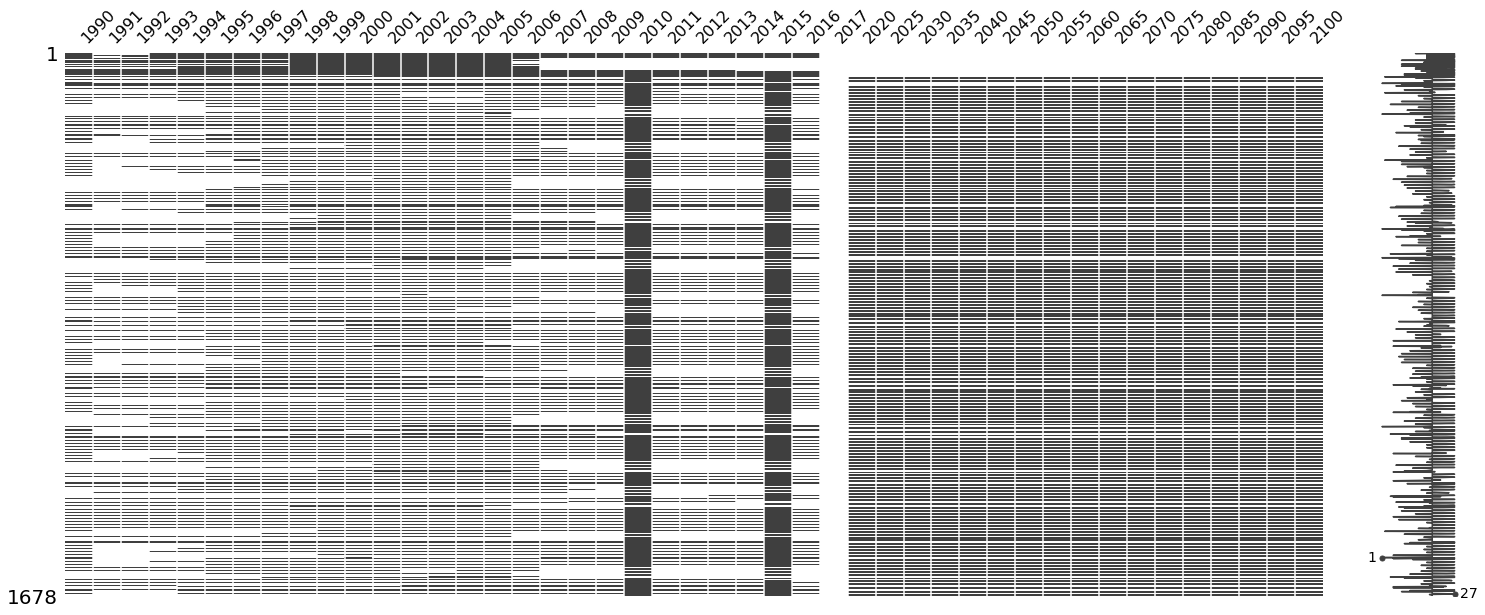

In [8]:
#On peut améliorer cela en commencant l'étude lorsque les données commencent à véritablement s'accumuler: 90+
msno.matrix(df_1.loc[:,"1990":])

In [22]:
df_1.iloc[:,4:].T.describe()

1245       1375       2084         4910       5040       5749    \
count    44.000000  20.000000  13.000000    47.000000  25.000000  19.000000   
mean   2549.437761  11.012568   2.526916  3654.092315  18.613058   3.690438   
std    1932.099337  12.657658   1.849316  2874.724000  18.133030   2.742755   
min     250.488643   0.000000   0.637900   316.225712   0.007288   0.523613   
25%    1492.292004   0.514340   1.147074  1242.472261   1.882787   1.147192   
50%    2012.684507   5.326347   1.887733  3423.174263  12.596964   2.982600   
75%    2650.338310  19.688571   3.401317  4707.356066  34.230838   6.147098   
max    7715.998677  36.868602   6.676681  9787.775545  52.796321   8.290790   

            8575       8705       9414          12240      12370      13079   \
count    47.000000  25.000000  19.000000     47.000000  27.000000  19.000000   
mean   1485.707955  14.869483   1.507349  19931.825469  38.448481  21.086629   
std    1936.181488  16.856878   1.726663  12612.819005  31.086124  15.151472   
min     114.138515   0.000000   0.048312   2231.949573   0.072801   3.927450   
25%     298.594740   0.324177   0.189289   8068.457601   3.996413   8.938429   
50%     535.833629   6.885265   0.739406  20190.188991  42.096423  17.099643   
75%    1543.219600  28.957572   2.267329  31486.522049  69.083276  29.922876   
max    6586.833593  48.386621   5.495883  42235.248954  80.446726  54.939223   

             15905      16035      16744         19570      19700      20409   \
count     47.000000  26.000000  19.000000     28.000000  25.000000  17.000000   
mean   11922.191981  31.121074  13.904042   4604.156879  19.629725   3.647259   
std     8078.412712  26.452311   9.693711   3145.745279  22.172605   2.928768   
min     1365.643199   0.048116   2.798375   1638.116465   0.000000   0.342745   
25%     4767.166488   3.879242   5.869375   2047.277232   0.707576   1.124033   
50%    11000.376220  30.361230  11.471852   2538.288554  10.976177   2.786773   
75%    18631.462896  54.730848  20.102231   7255.845540  35.884481   6.204706   
max    26352.539224  73.914751  34.330533  10653.399853  63.672750   9.736540   

             23235      23365      24074       26900      27030     27739   \
count     44.000000  24.000000  19.000000   47.000000  22.000000  8.000000   
mean   16447.399766  33.024104  20.008684  424.471882   3.538365  0.547720   
std    11071.465734  29.098475  14.565736  210.800201   4.599825  0.335703   
min     1936.266710   0.069334   4.005113  152.409191   0.000000  0.264392   
25%     6782.523136   2.499550   8.434961  311.279116   0.194439  0.364929   
50%    16274.370887  30.219523  15.898310  353.548682   1.385671  0.422836   
75%    21067.939522  61.268743  27.902524  419.753343   5.288970  0.596188   
max    37872.038052  75.497623  52.911759  919.197128  15.667876  1.305173   

             30565      30695      31404         34230      34360      35069   \
count     47.000000  27.000000  19.000000     47.000000  26.000000  18.000000   
mean   21590.836318  42.448870  27.522403   4007.676990  18.849221   3.608141   
std    13208.276451  30.993785  17.147450   2869.781764  19.416075   3.227705   
min     2811.009625   0.263936   7.801902    612.720440   0.000000   0.316887   
25%     9631.496967   8.636132  13.272766   1856.273745   0.764612   1.013662   
50%    21285.125100  49.933772  23.639951   3331.977867  12.844770   2.683911   
75%    33125.598870  71.235289  36.806571   4784.682717  33.790793   5.359257   
max    42826.392663  81.967715  64.733493  10237.424348  56.373113  11.250824   

            37895      38025      38734        41560      41690     42399   \
count    47.000000  26.000000  18.000000    32.000000  21.000000  8.000000   
mean   3861.043172  18.464148   3.529507   473.793394   3.424051  0.470826   
std    2759.538791  19.217666   3.199389   267.380393   4.634421  0.372679   
min     581.413101   0.000000   0.309835   234.487703   0.000000  0.168107   
25%    1805.825772   0.714

# Résumé:
 _Les bandes noires sont les variables indicatrices (indicator code, country name) mis à part la dernière qui est "unnamed"<br/>
 _le bloc de gauche très disparatre avec deux parties: <br/>
     _jusqu'aux années 95+: peu de donnée. <br/>
     _après 95+: de plus en plus de donnée<br/>
 Sur l'ensemble de ce bloc on a des pics de donnée tous les 5ans, que je suppose être basé sur la méthode d'étude.<br/>
 _le bloc à droite: les prédictions qui sont faites à intervalles de 5ans sur des indicateur précis.<br/>
 Ce sont des données régulières<br/>
 _L'ensemble des données est déjà moins disparatre.

# Quel est le poucentage de donnée présent sur les indicateurs choisis?

<ipython-input-29-7f5c36ac3e70>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j["NotMissing"] = j.notna().sum(axis=1)
<ipython-input-29-7f5c36ac3e70>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j["NotMissing"] /= 70
<ipython-input-29-7f5c36ac3e70>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

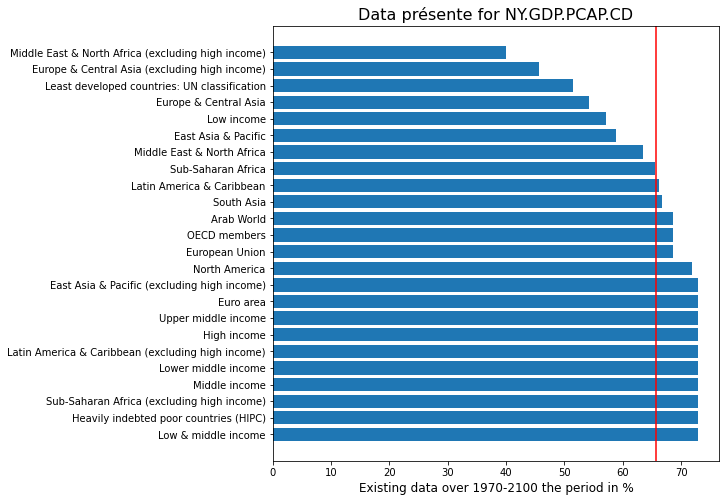

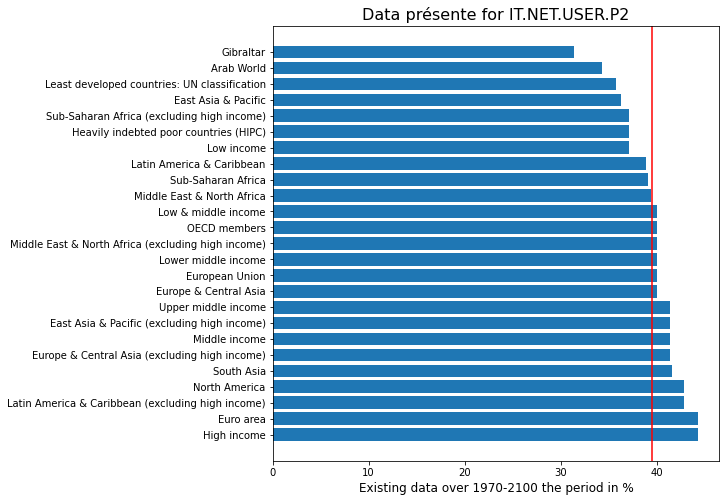

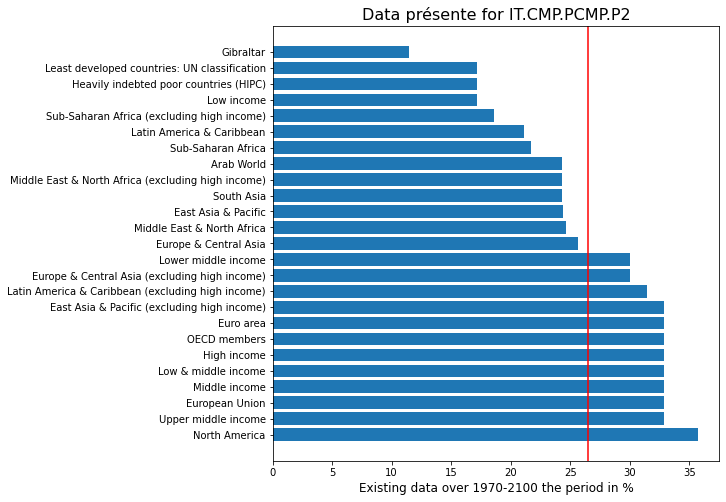

In [29]:
l_int=['NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2']
l_15_19=["PRJ.POP.1519.2.MF", "PRJ.POP.1519.4.MF","PRJ.POP.1519.3.MF"]
l_20_24=["PRJ.POP.2024.2.MF", "PRJ.POP.2024.4.MF", "PRJ.POP.2024.3.MF"]
l_temp = l_15_19 + l_20_24
l_tot = l_int + l_15_19 + l_20_24
# l_tot=['NY.GDP.PCAP.CD']

###############################################################################################################################

df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1=df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
df_1 = df_1.drop(columns="Indicator Name")
df_1 = df_1.drop(df_1[df_1["Country Name"]=="World"].index)
df_1 = df_1[df_1["Indicator Code"].isin(l_tot)]
df_1 = df_1[df_1.iloc[:,4:].notna().sum(axis=1)>0] 

###############################################################################################################################
count = 0
for indic in l_int:
    j = df_1[df_1["Indicator Code"]==indic]
#     .notna().sum(axis=1)
#     j/=70
#     j*=100
    j["NotMissing"] = j.notna().sum(axis=1)
    j["NotMissing"] /= 70
    j["NotMissing"] *= 100
    j = j.drop(["Country Code", "Country Name", "Indicator Code"], axis=1)
    k = j.groupby(["Region"])["NotMissing"].mean()
    k = pd.DataFrame(data=k, columns=["NotMissing"]) 
    k = k.sort_values(by= "NotMissing",ascending=False)
    plt.figure(figsize=(8,8))
    plt.title("Data présente for "+str(indic), fontdict={'size':16})
    plt.axvline(x=k["NotMissing"].mean(), color='r')
    plt.xlabel("Existing data over 1970-2100 the period in %", fontdict={'size':12})
    plt.barh(k.index, k["NotMissing"])
    name = "plt_indic"+str(count)
    plt.savefig(name, bbox_inches='tight')
    count += 1


<BarContainer object of 1678 artists>

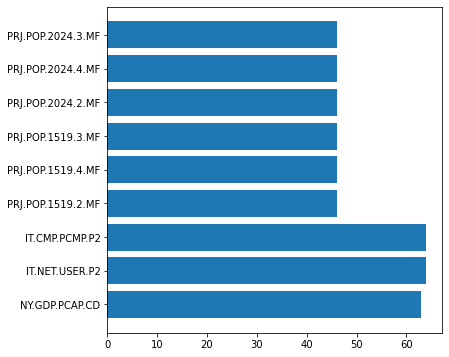

In [17]:
l_int=['NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2']
l_15_19=["PRJ.POP.1519.2.MF", "PRJ.POP.1519.4.MF","PRJ.POP.1519.3.MF"]
l_20_24=["PRJ.POP.2024.2.MF", "PRJ.POP.2024.4.MF", "PRJ.POP.2024.3.MF"]
l_temp = l_15_19 + l_20_24
l_tot = l_int + l_15_19 + l_20_24
# l_tot=['NY.GDP.PCAP.CD']

###############################################################################################################################

df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1=df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
df_1 = df_1.drop(columns="Indicator Name")
df_1 = df_1.drop(df_1[df_1["Country Name"]=="World"].index)
df_1 = df_1[df_1["Indicator Code"].isin(l_tot)]
df_1 = df_1[df_1.iloc[:,4:].notna().sum(axis=1)>0] 

###############################################################################################################################

df_1["missing values"] = df_1.iloc[:,4:].isnull().sum(axis=1)
plt.figure(figsize=(6,6))
# plt.xticks(rotation=90)
plt.barh(df_1.iloc[:,3], df_1.iloc[:,-1])

# Résumé:
     l_int: _'NY.GDP.PCAP.CD' : PIB par habitant, Min:40%, Max:+70%, quelques régions moins fournies mais dans l'ensemble assez bien rempli (60+% en moyenne) <br/>
            _'IT.NET.USER.P2' : Accès à internet, Min:32%, Max:45%, quelques régions moins fournies mais dans l'ensemble assez bien rempli (60+% en moyenne) <br/>
            _'IT.CMP.PCMP.P2' : accès à un ordinateur, Min:11%, Max:36%, De gros manques pour les régions avec un moindre PIB (intéressant à corréler)<br/>
  L_int sera utilisée pour les dernières valeurs, ces dernières valeurs ne seront pas forcément indicative de la situation présente mais utile pour se donnée un ordre d'idée pour le futur.<br/>
     l_15_19: Données basées sur la prédiction 2020-2100 d'une même étude, rien d'étonnant à ce que les moyennes de données 
             présentes soient les mêmes.35% quand on étudie sur 1970-2100. 100% sur 2020-2100.<br/>
     l_20_24: Données basées sur la prédiction 2020-2100 d'une même étude, rien d'étonnant à ce que les moyennes de données 
             présentes soient les mêmes.<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Y a-t-il encore des données corrompues sur le jeu?

In [26]:
l_int=['NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2']
l_15_19=["PRJ.POP.1519.2.MF", "PRJ.POP.1519.4.MF","PRJ.POP.1519.3.MF"]
l_20_24=["PRJ.POP.2024.2.MF", "PRJ.POP.2024.4.MF", "PRJ.POP.2024.3.MF"]
l_temp = l_15_19 + l_20_24
l_tot = l_int + l_15_19 + l_20_24
# l_tot=['NY.GDP.PCAP.CD']

###############################################################################################################################

df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1 = df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
df_1 = df_1.drop(columns="Indicator Name")
df_1 = df_1.drop(df_1[df_1["Country Name"]=="World"].index)
print(df_1.index.size)
df_1 = df_1[df_1["Indicator Code"].isin(l_tot)]
print(df_1.index.size)
df_1 = df_1[df_1.iloc[:,4:].notna().sum(axis=1)>0] 
print(df_1.index.size)
r = df_1[df_1.iloc[:,4:].sum(axis=1)==0]
# print(r.index.size)
#On peut remplacer les valeurs 0 par le mean des régions concernées

883265
2169
1678


In [29]:
r["Country Name"].unique().size()

67

In [36]:
r["Indicator Code"].value_counts()

PRJ.POP.1519.4.MF    63
IT.NET.USER.P2        4
PRJ.POP.2024.4.MF     1
Name: Indicator Code, dtype: int64

Résumé: seule l'indicateur PRJ.POP.1519.4.MF (15-19post secondary)est problématique

In [37]:
r = r[r["Indicator Code"]=="PRJ.POP.1519.4.MF"]
r["Region"].value_counts()

Europe & Central Asia         26
Sub-Saharan Africa            24
Latin America & Caribbean      5
East Asia & Pacific            4
Middle East & North Africa     3
South Asia                     1
Name: Region, dtype: int64

In [42]:
df_1["Country Name"].unique().size

236

<BarContainer object of 25 artists>

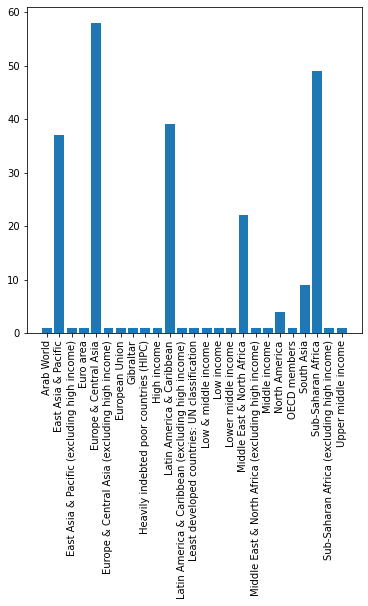

In [65]:
l = df_1.groupby("Region")["Country Name"].unique()

l.values
for value in range(0, l.values.size):
    l.values[value] = l.values[value].size
    
plt.figure(figsize=(6,6))
plt.xticks(rotation=90)
plt.bar(l.index, l.values)

# Scoring par pays

### 3 je dois maintenant créer mon jeu de données d'étude pour ces indicateurs et me créer un scoring<br/>
 Pour créer mon scoring j'ai étudié les différents indicateurs choisis pour émettre une valeur cohérente de notation<br/>
 voici les notations et les démarches:<br/>
     'NY.GDP.PCAP.CD' (gdp per capita) = s'arrête en 2020, on peut prendre la dernière valeur<br/>
     'IT.NET.USER.P2' (net user/100p) = s'arrête en 2016, on peut prendre la dernière valeur<br/>
     'IT.CMP.PCMP.P2' (personnal computer/100p) = s'arrête en 2008, on peut prendre la dernière valeur<br/>
     'PRJ.POP.1519.2.MF' (Lower Secondary) = 2010 à 2100, On étudie à partir de 2020, on étudie le volume et fait varier par l'évolution<br/>
     'PRJ.POP.1519.4.MF' (post secondary) = 2010 à 2100, On étudie à partir de 2020, on étudie le volume et fait varier par l'évolution<br/>
     'PRJ.POP.1519.3.MF' (upper secondary) = 2010 à 2100, On étudie à partir de 2020, on étudie le volume et fait varier par l'évolution<br/>
     'PRJ.POP.2024.2.MF' (lower secondary) = 2010 à 2100, On étudie à partir de 2020, on étudie le volume et fait varier par l'évolution<br/>
     'PRJ.POP.2024.4.MF' (post secondary) = 2010 à 2100, On étudie à partir de 2020, on étudie le volume et fait varier par l'évolution<br/>
     'PRJ.POP.2024.3.MF' (upper secondary) = 2010 à 2100, On étudie à partir de 2020, on étudie le volume et fait varier par l'évolution<br/>

 Mon idée est simple, je pense, je réfléchis de manière purement financière pour l'entreprise.<br/>
 Plus je considère un pays comme un volume potentiel en considérant les différents échantillons 15-19 et 20-24.<br/>
 Ce qui crée le pool de clients potentiel, je viens ensuite utiliser les variables communication pour définir quel pourcentage est apte à suivre le cours<br/>
 (même si les échantillons étudiés ne répondent sûrement pas à cette variable internet/pc de par la jeunesse de sa population)<br/>
 je viens ensuite utiliser la variable financière pour multiplier le tout et obtenir le potentiel financier du pays <br/>
 On a Score = P*E*G<br/>
 Avec:<br/>
     P = la population en calculant l'aire sous la courbe<br/>
     E = le score d'équipement<br/>
     G = la capacité monétaire moyenne d'un lambda<br/>

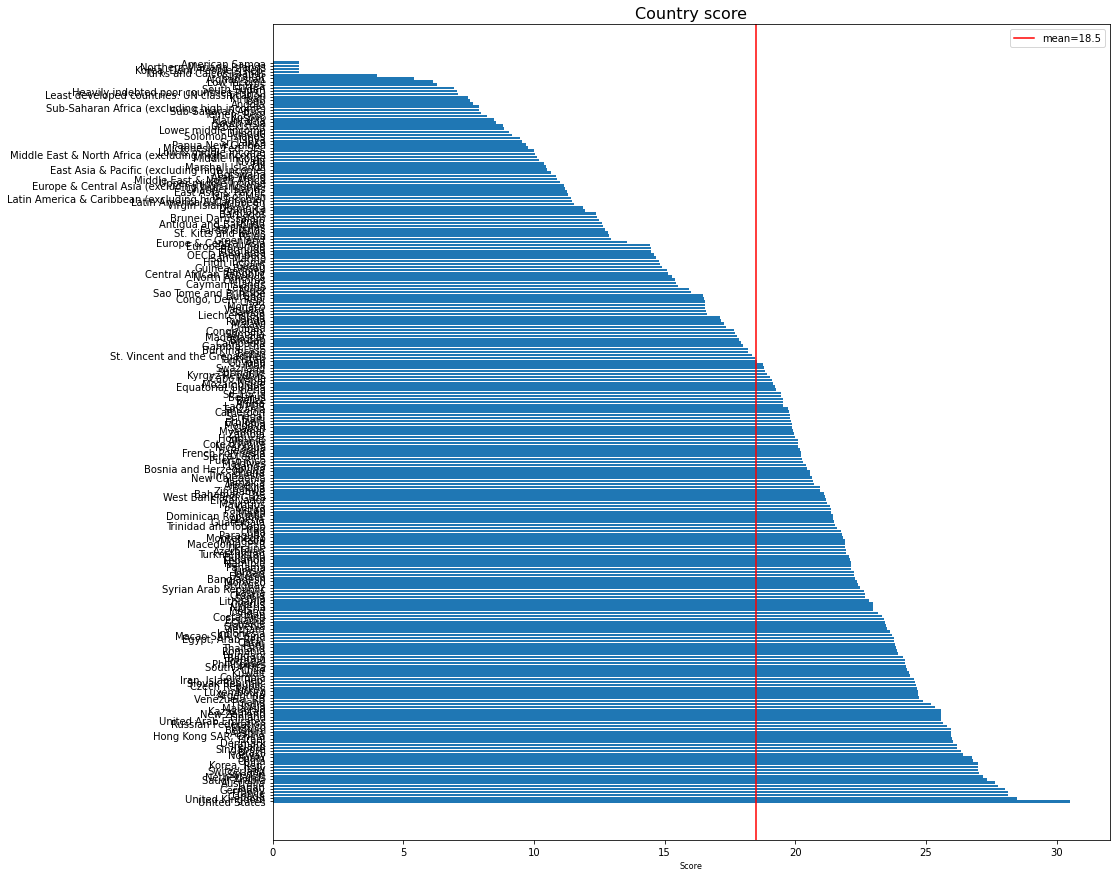

In [29]:
 
#Maintenant on va chercher les données pour scorer
l_int=['NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2']
l_15_19=["PRJ.POP.1519.2.MF", "PRJ.POP.1519.4.MF","PRJ.POP.1519.3.MF"]
l_20_24=["PRJ.POP.2024.2.MF", "PRJ.POP.2024.4.MF", "PRJ.POP.2024.3.MF"]
l_temp = l_15_19 + l_20_24
l_tot = l_int+ l_15_19+ l_20_24

###############################################################################################################################

#On nettoie la donnée tout d'abord
#Je devrais aussi faire un nettoyage par indicateur avec drop d'indicateurs projection n'ayant pas de valeur sur les années>=2020 par exemple
df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1=df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
#Maintenant que nous avons les indicateurs que nous voulons nous pouvons conserver uniquement leur codes
df_1 = df_1.drop(columns="Indicator Name")
#On peut aussi drop la région world qui est un peu large
df_1 = df_1.drop(df_1[df_1["Country Name"]=="World"].index)
#Puis on peut conserver uniquement les indicateurs qui nous intéressent
df_1 = df_1[df_1["Indicator Code"].isin(l_tot)]
#Et enfin drop les colonnes totalement vides
df_1 = df_1[df_1.iloc[:,4:].notna().sum(axis=1)>0]

###############################################################################################################################

#on cherche pour chaque indicateur, la dernière valeur
df_1["last value"] = df_1.apply(recup_last, axis=1)
#On cherche pour chaque indicateur la valeur de l'aire sous la courbe afin d'obtenir une surface représentant le volument potentiel de clients
df_1["AUC"] = df_1.iloc[:,4:-1].apply(AUC, axis=1)

###############################################################################################################################

#On peut passer à l'analyser, on crée un nouveau data frame où l'on va stocker les scores
df_pays_score = pd.DataFrame({'Country Name' : df_1["Country Name"].unique()})
df_pays_score["Score"] = ""

###############################################################################################################################

#on va scorer pour chaque pays
for pays in df_pays_score["Country Name"].unique():
#     print(pays)
    df_pays_score.loc[df_pays_score[df_pays_score["Country Name"]==pays].index, "Score"] = score_that_country_please(df_1[df_1["Country Name"]==pays], l_temp, l_int)

###############################################################################################################################

#On affiche la scorelist avec les meilleurs scores en premier
df_pays_score=df_pays_score.sort_values(by="Score", ascending=False)
mean_score = df_pays_score["Score"].mean()
plt.figure(figsize=(15,15))
plt.title("Country score", fontdict={'size':16})
plt.xlabel("Score", fontdict={'size':8})
# plt.xticks(rotation=90)
plt.axvline(x=mean_score, color='r')
plt.legend(["mean="+str(round(mean_score,2))],loc="upper right")
plt.barh(df_pays_score["Country Name"], df_pays_score["Score"])
plt.savefig("graphe score study country", bbox_inches='tight')

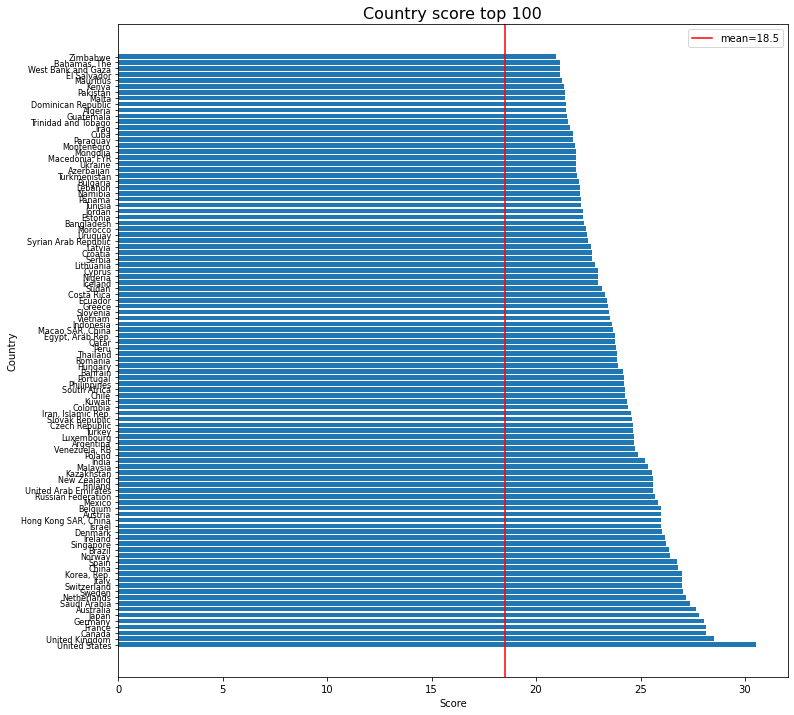

In [30]:
mean_score = df_pays_score["Score"].mean()
df_pays_score_b=df_pays_score[df_pays_score["Score"]>mean_score]

###############################################################################################################################

plt.figure(figsize=(12,12))
plt.title("Country score top 100", fontdict={'size':16})
plt.xlabel("Score", fontdict={'size':10})
plt.ylabel("Country", fontdict={'size':10})
plt.yticks(fontsize=8)
# plt.xticks(rotation=90)
plt.axvline(x=mean_score, color='r')
plt.legend(["mean="+str(round(mean_score,2))],loc="upper right")

plt.barh(df_pays_score_b.iloc[0:100]["Country Name"], df_pays_score_b.iloc[0:100]["Score"])
plt.savefig("graphe score study country top 100", bbox_inches='tight')

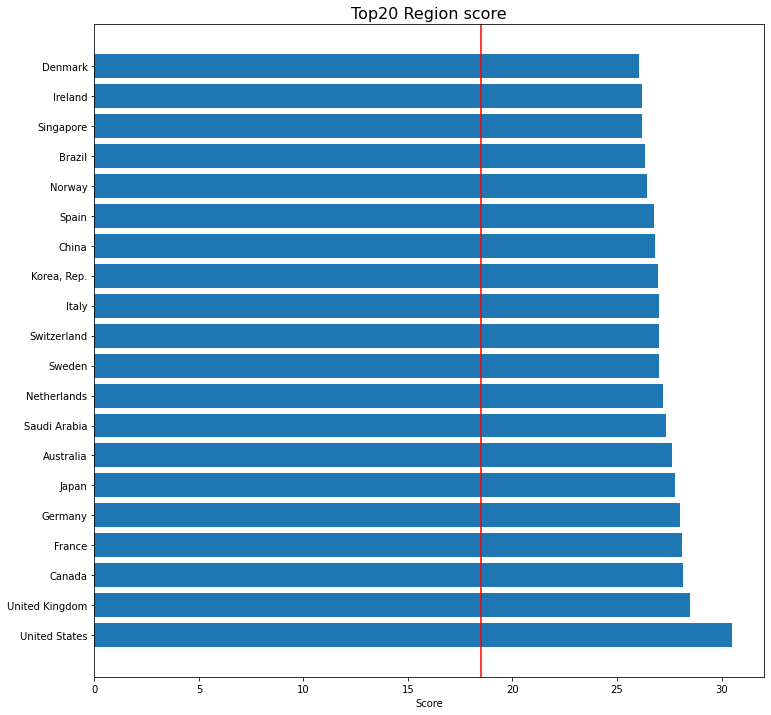

In [24]:
df_pays_score_b=df_pays_score.iloc[0:20,:]

plt.figure(figsize=(12,12))
plt.title("Top20 Region score", fontdict={'size':16})
plt.xlabel("Score", fontdict={'size':10})
# plt.xticks(rotation=90)
plt.axvline(x=mean_score, color='r')
plt.barh(df_pays_score_b["Country Name"], df_pays_score_b["Score"])
plt.savefig("graphe score study country top 20", bbox_inches='tight')


# Résumé: voici le top20 des pays en terme de volume financier
Pas de vraie surprise, le modèle étasunien éducatif est basé sur qualité=MONEY<br/>
Les pays européens se construisent sur ce modèle peu à peu, mis à part l'angleterre qui était déjà sur ce modèle<br/>
Certains pays sont plus soutenus par leur fort pib/habitant ou par leur forte population<br/>



mean = 12.756628568129923


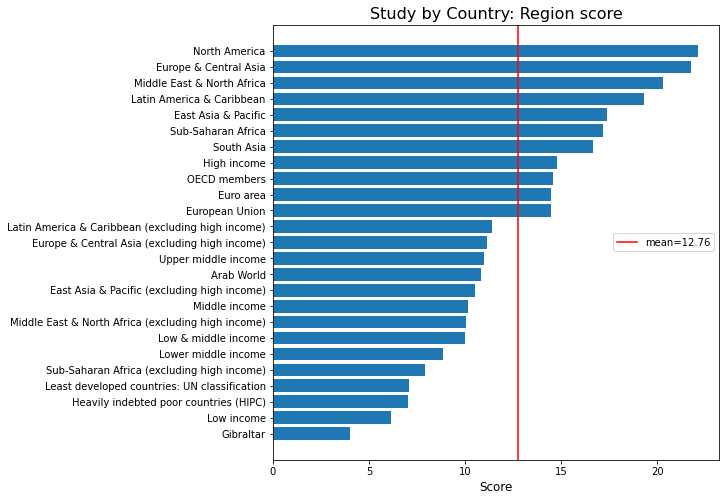

In [34]:
#On peut ensuite récupérer les scores de chaque pays et les grouper par région pour étudier le score moyen de chaque région et en faire une nouvelle scorelist

df_2 = pd.merge(df_pays_score, df_1.iloc[:,[0,2]] ,left_on="Country Name", right_on="Country Name", how="left")
df_2 = df_2.drop_duplicates()

###############################################################################################################################

l = pd.to_numeric(df_2["Score"]).groupby(df_2["Region"]).mean().sort_values(ascending=False)
#print(l)
#et pourquoi pas en faire un petit graphique
print("\n")
l = l.sort_values(ascending = True)
mean_score = l.mean()
print("mean = "+str(mean_score))

###############################################################################################################################

plt.figure(figsize=(8,8))
plt.title("Study by Country: Region score", fontdict={'size':16})
# plt.ylabel("Region", fontdict={'size':16})
plt.xlabel("Score", fontdict={'size':12})
# plt.xticks(rotation=90)
plt.axvline(x=mean_score, color='r')
plt.legend(["mean="+str(round(mean_score,2))],loc="center right")
plt.barh(l.index, l.values)
plt.savefig("graphe score study country", bbox_inches='tight')


# Résumé:
 On peut considérer les régions qui dépassent la moyenne comme pouvant être source d'intérêt pour le déploiement de l'entreprise.<br/>
 On peut néanmoins remarquer que les low income influent beaucoup<br/>

# Scoring par Région

mean = 15.227255974088994


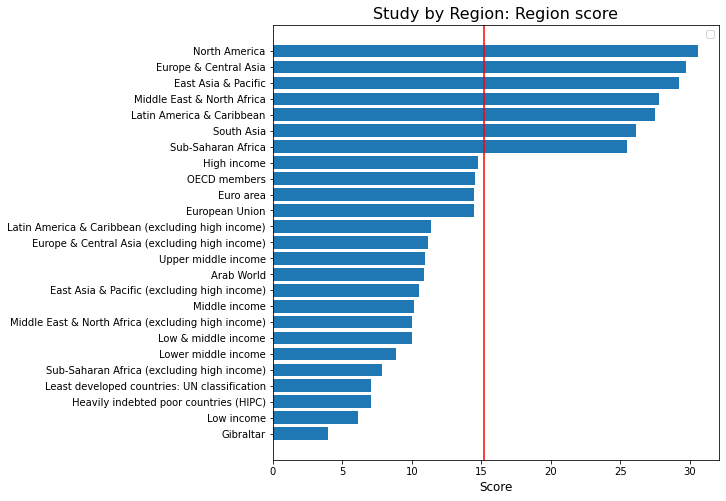

In [21]:
#On peut maintenant faire une analyse par région pour soutenir lla première analyse par pays
#Celle-ci reprend les mêmes mécaniques que celles avec les pays, on va simplement récupérer les valeurs par région et les groupby puis les aggréger
l_int=['NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2']
l_15_19=["PRJ.POP.1519.2.MF", "PRJ.POP.1519.4.MF","PRJ.POP.1519.3.MF"]
l_20_24=["PRJ.POP.2024.2.MF", "PRJ.POP.2024.4.MF", "PRJ.POP.2024.3.MF"]
l_temp = l_15_19 + l_20_24
l_tot = l_int+ l_15_19+ l_20_24

###############################################################################################################################

#Création et nettoyage de dataset
df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1 = df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
df_1 = df_1.drop(columns="Indicator Name")
df_1 = df_1.drop(df_1[df_1["Country Name"]=="World"].index)
df_1 = df_1[df_1["Indicator Code"].isin(l_tot)]
df_1 = df_1[df_1.iloc[:,4:].notna().sum(axis=1)>0]

###############################################################################################################################

#calcul de dernière valeur viable et aire sous la courbe
df_1["last value"] = df_1.apply(recup_last, axis=1)
df_1["AUC"] = df_1.iloc[:,4:-1].apply(AUC, axis=1)

df_region_score = pd.DataFrame({'Region' : df_1["Region"].unique()})
df_region_score["Score"] = ""
for region in df_region_score["Region"].unique():
    df_region_score.loc[df_region_score[df_region_score["Region"]==region].index, "Score"] = score_that_region_please(df_1[df_1["Region"]==region], l_temp, l_int)

df_region_score = df_region_score.sort_values(by="Score", ascending=True)

###############################################################################################################################

mean_score = df_region_score["Score"].mean()
print("mean = "+str(mean_score))

###############################################################################################################################

plt.figure(figsize=(8,8))
plt.title("Study by Region: Region score", fontdict={'size':16})
plt.xlabel("Score", fontdict={'size':12})
# plt.xticks(rotation=90)
plt.legend(["mean="+str(round(mean_score,2))],loc="upper right")
plt.axvline(x=mean_score, color='r')
plt.barh(df_region_score["Region"], df_region_score["Score"])
plt.savefig("graphe score study region", bbox_inches='tight')



# Résumé:
 On peut considérer les régions qui dépassent la moyenne comme pouvant être source d'intérêt pour le déploiement de l'entreprise.<br/>
 On peut néanmoins remarquer que les low income influent beaucoup<br/>
 On observe une différence avec le précédent graphe notamment sur les classements.<br/>
 On peut attribuer ces différences par l'attribution de mauvais indicateurs à des pays qui n'en avaient pas, 
 ou à l'hétérogénéité des pays au sein de ces régions.<br/>

# Indicateurs statistiques classiques par région/indicateur

<!-- Résumé de la score liste: -->



Dans la région Gibraltar l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 16.54.
Mais aussi un ecart-type de 17.43.
Son skewness 1.89 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 3.64 indique que sa distribution est moins aplatie que la distribution normale : les observations sont plus concentrées.
En voici une petite boîte à moustache:


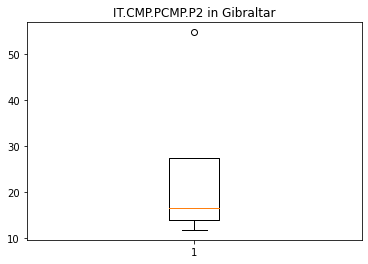



--------------------------------------------------



Dans la région Low income l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 0.39.
Mais aussi un ecart-type de 0.17.
Son skewness 0.69 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis -0.53 indique que les observations sont moins concentrées : la distribution est plus aplatie.
En voici une petite boîte à moustache:


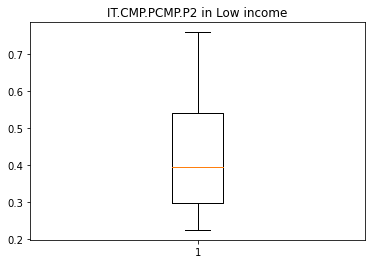



--------------------------------------------------



Dans la région Heavily indebted poor countries (HIPC) l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 0.42.
Mais aussi un ecart-type de 0.31.
Son skewness 1.99 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 4.28 indique que sa distribution est moins aplatie que la distribution normale : les observations sont plus concentrées.
En voici une petite boîte à moustache:


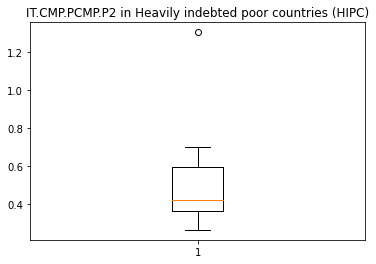



--------------------------------------------------



Dans la région Least developed countries: UN classification l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 0.31.
Mais aussi un ecart-type de 0.35.
Son skewness 1.65 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 2.59 indique que sa distribution est moins aplatie que la distribution normale : les observations sont plus concentrées.
En voici une petite boîte à moustache:


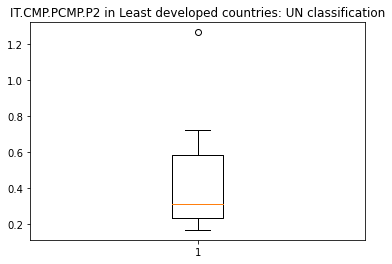



--------------------------------------------------



Dans la région Sub-Saharan Africa (excluding high income) l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 0.92.
Mais aussi un ecart-type de 0.33.
Son skewness 1.57 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 2.62 indique que sa distribution est moins aplatie que la distribution normale : les observations sont plus concentrées.
En voici une petite boîte à moustache:


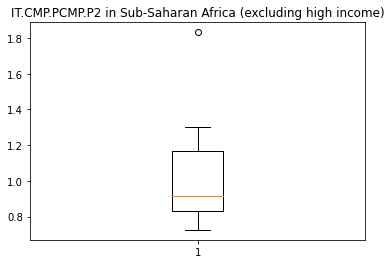



--------------------------------------------------



Dans la région Lower middle income l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 0.48.
Mais aussi un ecart-type de 0.85.
Son skewness 1.9 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 3.63 indique que sa distribution est moins aplatie que la distribution normale : les observations sont plus concentrées.
En voici une petite boîte à moustache:


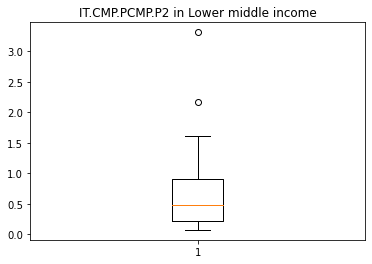



--------------------------------------------------



Dans la région Low & middle income l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 0.94.
Mais aussi un ecart-type de 1.49.
Son skewness 1.11 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 0.2 indique que la distribution a le même aplatissement que la distribution normale.
En voici une petite boîte à moustache:


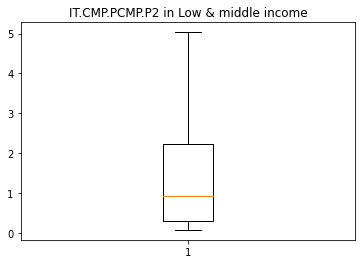



--------------------------------------------------



Dans la région Middle East & North Africa (excluding high income) l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 2.52.
Mais aussi un ecart-type de 1.46.
Son skewness 0.73 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 0.05 indique que la distribution a le même aplatissement que la distribution normale.
En voici une petite boîte à moustache:


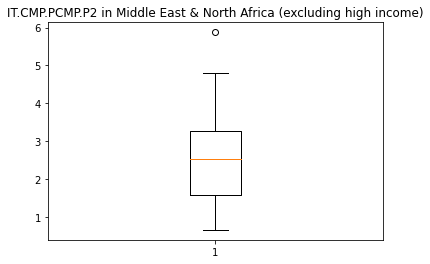



--------------------------------------------------



Dans la région Middle income l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 0.97.
Mais aussi un ecart-type de 1.59.
Son skewness 1.08 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 0.04 indique que la distribution a le même aplatissement que la distribution normale.
En voici une petite boîte à moustache:


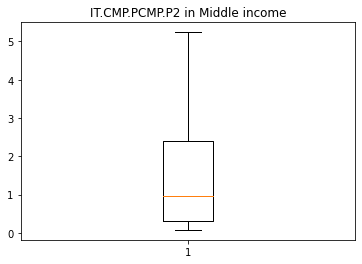



--------------------------------------------------



Dans la région East Asia & Pacific (excluding high income) l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 0.74.
Mais aussi un ecart-type de 1.68.
Son skewness 1.18 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 0.23 indique que sa distribution est moins aplatie que la distribution normale : les observations sont plus concentrées.
En voici une petite boîte à moustache:


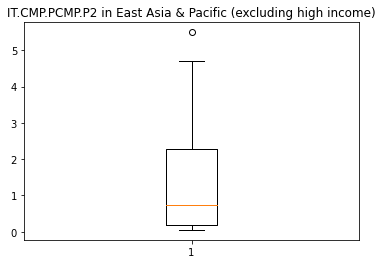



--------------------------------------------------



Dans la région Arab World l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 1.89.
Mais aussi un ecart-type de 1.78.
Son skewness 1.19 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 0.72 indique que sa distribution est moins aplatie que la distribution normale : les observations sont plus concentrées.
En voici une petite boîte à moustache:


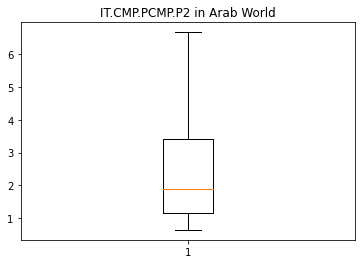



--------------------------------------------------



Dans la région Upper middle income l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 1.55.
Mais aussi un ecart-type de 2.43.
Son skewness 0.9 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis -0.57 indique que les observations sont moins concentrées : la distribution est plus aplatie.
En voici une petite boîte à moustache:


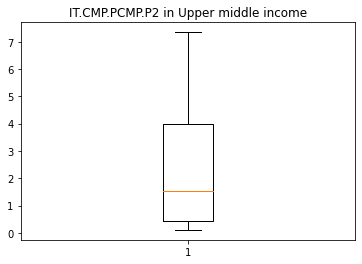



--------------------------------------------------



Dans la région Europe & Central Asia (excluding high income) l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 2.79.
Mais aussi un ecart-type de 2.84.
Son skewness 0.65 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis -0.71 indique que les observations sont moins concentrées : la distribution est plus aplatie.
En voici une petite boîte à moustache:


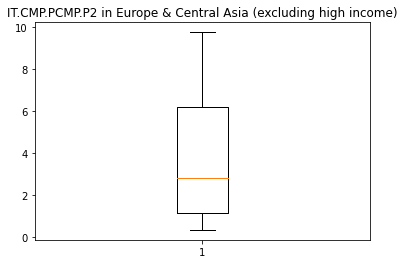



--------------------------------------------------



Dans la région Latin America & Caribbean (excluding high income) l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 2.61.
Mais aussi un ecart-type de 3.11.
Son skewness 1.13 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 0.58 indique que sa distribution est moins aplatie que la distribution normale : les observations sont plus concentrées.
En voici une petite boîte à moustache:


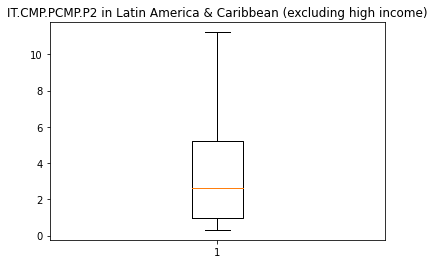



--------------------------------------------------



Dans la région European Union l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 15.9.
Mais aussi un ecart-type de 14.18.
Son skewness 0.94 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis -0.01 indique que la distribution a le même aplatissement que la distribution normale.
En voici une petite boîte à moustache:


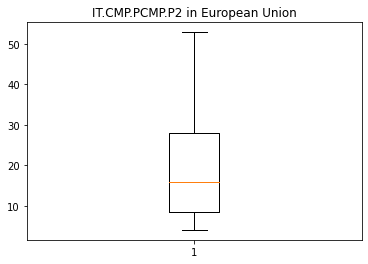



--------------------------------------------------



Dans la région Euro area l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 17.1.
Mais aussi un ecart-type de 14.75.
Son skewness 0.85 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis -0.21 indique que les observations sont moins concentrées : la distribution est plus aplatie.
En voici une petite boîte à moustache:


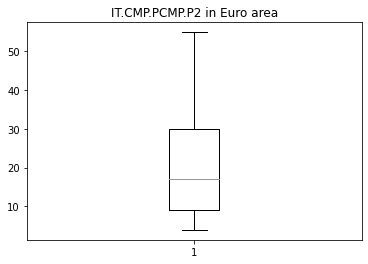



--------------------------------------------------



Dans la région OECD members l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 21.52.
Mais aussi un ecart-type de 14.66.
Son skewness 0.78 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis -0.33 indique que les observations sont moins concentrées : la distribution est plus aplatie.
En voici une petite boîte à moustache:


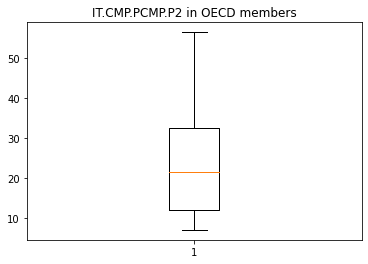



--------------------------------------------------



Dans la région High income l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 23.64.
Mais aussi un ecart-type de 16.69.
Son skewness 0.8 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis -0.26 indique que les observations sont moins concentrées : la distribution est plus aplatie.
En voici une petite boîte à moustache:


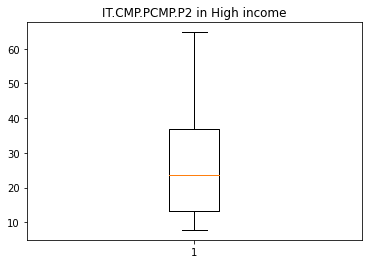



--------------------------------------------------



Dans la région Sub-Saharan Africa l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 1.4.
Mais aussi un ecart-type de 0.97.
Son skewness 0.66 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 0.12 indique que la distribution a le même aplatissement que la distribution normale.
En voici une petite boîte à moustache:


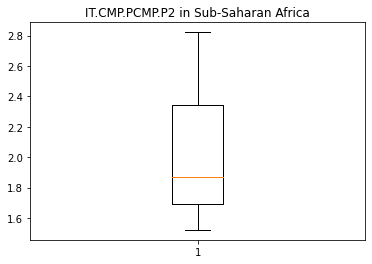



--------------------------------------------------



Dans la région South Asia l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 0.93.
Mais aussi un ecart-type de 1.12.
Son skewness 0.86 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 1.11 indique que sa distribution est moins aplatie que la distribution normale : les observations sont plus concentrées.


--------------------------------------------------



Dans la région Latin America & Caribbean l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 5.88.
Mais aussi un ecart-type de 2.39.
Son skewness 0.39 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 0.18 indique que la distribution a le même aplatissement que la distribution normale.


--------------------------------------------------



Dans la région Middle East & North Africa l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 5.33.
Mais aussi un ecart-type de 4.44.
Son skewness 0.71 indique que la distribution est plutôt éta

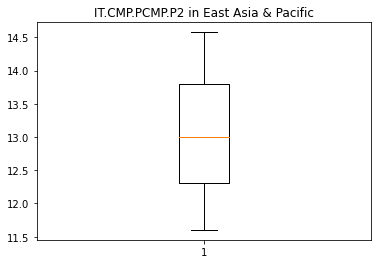



--------------------------------------------------



Dans la région Europe & Central Asia l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 14.83.
Mais aussi un ecart-type de 9.1.
Son skewness 0.57 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis -0.28 indique que les observations sont moins concentrées : la distribution est plus aplatie.


--------------------------------------------------



Dans la région North America l'indicateur IT.CMP.PCMP.P2 a pour valeur médiane 27.36.
Mais aussi un ecart-type de 20.58.
Son skewness 0.55 indique que la distribution est plutôt étalée à droite.
Enfin son kurtosis 0.11 indique que la distribution a le même aplatissement que la distribution normale.
En voici une petite boîte à moustache:


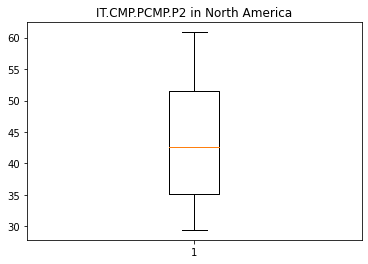



--------------------------------------------------




In [22]:
#Via cette note on peut choisir n'importe quel indicateur et avoir des indicateurs statistiques de toutes les régions 
#avec un petit résumé de celles-ci
l_int=['NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2']
l_15_19=["PRJ.POP.1519.2.MF", "PRJ.POP.1519.4.MF","PRJ.POP.1519.3.MF"]
l_20_24=["PRJ.POP.2024.2.MF", "PRJ.POP.2024.4.MF", "PRJ.POP.2024.3.MF"]
l_temp = l_15_19 + l_20_24
l_tot = l_int+ l_15_19+ l_20_24
l_indic = ['Var', 'Std', 'Skew', 'Kurtosis']


###############################################################################################################################

df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1=df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
df_1 = df_1.drop(columns="Indicator Name")
df_1 = df_1.drop(df_1[df_1["Country Name"]=="World"].index)
df_1 = df_1[df_1["Indicator Code"].isin(l_tot)]
df_1 = df_1[df_1.iloc[:,4:].notna().sum(axis=1)>0] 
# df_1.iloc[:,4:].T.describe().T


###############################################################################################################################

df_1["Mean"]= df_1.iloc[:,4:69].mean(axis=1)
df_1["Median"]= df_1.iloc[:,4:69].median(axis=1)
df_1["Var"]= df_1.iloc[:,4:69].var(axis=1,ddof=0)
df_1["Std"]= df_1.iloc[:,4:69].std(axis=1,ddof=0)
df_1["Skew"]= df_1.iloc[:,4:69].skew(axis=1)
df_1["Kurtosis"]= df_1.iloc[:,4:69].kurtosis(axis=1)

df_2= df_1.groupby(by=["Region", "Indicator Code"])["Median"].mean()
for indic in l_indic:
    df_2= pd.merge(df_2, df_1.groupby(by=["Region", "Indicator Code"])[indic].mean(),
                   left_on=["Region", "Indicator Code"], 
                   right_on=["Region", "Indicator Code"], how="left")

###############################################################################################################################
    
for region in df_region_score.iloc[:,0].values:
    petit_resume_svp(df_2, region, "IT.CMP.PCMP.P2", df_1)
    print("\n")
    print("-"*50)
    print("\n")


# scoring plus critique sur le manque de données



mean = 22.958515520599573


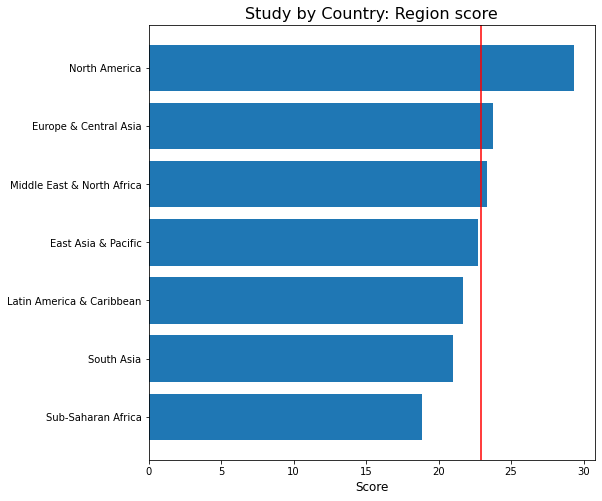

In [44]:
   
#Maintenant on va chercher les données pour scorer
l_int=['NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2']
l_15_19=["PRJ.POP.1519.2.MF", "PRJ.POP.1519.4.MF","PRJ.POP.1519.3.MF"]
l_20_24=["PRJ.POP.2024.2.MF", "PRJ.POP.2024.4.MF", "PRJ.POP.2024.3.MF"]
l_temp = l_15_19 + l_20_24
l_tot = l_int+ l_15_19+ l_20_24

###############################################################################################################################

#On nettoie la donnée tout d'abord
#Je devrais aussi faire un nettoyage par indicateur avec drop d'indicateurs projection n'ayant pas de valeur sur les années>=2020 par exemple
df_1 = pd.merge(data.iloc[:,0:2], data_country.iloc[:,[0,7]] ,left_on="Country Code", right_on="Country Code", how="left")
df_1=df_1.join(data.iloc[:,2:])
df_1["Region"] = df_1.apply(lambda x : country_to_region(x),axis=1)
df_1 = df_1.drop(columns=df_1.columns[-1])
#Maintenant que nous avons les indicateurs que nous voulons nous pouvons conserver uniquement leur codes
df_1 = df_1.drop(columns="Indicator Name")
#On peut aussi drop la région world qui est un peu large
df_1 = df_1.drop(df_1[df_1["Country Name"]=="World"].index)
#Puis on peut conserver uniquement les indicateurs qui nous intéressent
df_1 = df_1[df_1["Indicator Code"].isin(l_tot)]
#Et enfin drop les colonnes totalement vides
df_1 = df_1[df_1.iloc[:,4:].notna().sum(axis=1)>0]

###############################################################################################################################

#on cherche pour chaque indicateur, la dernière valeur
df_1["last value"] = df_1.apply(recup_last, axis=1)
#On cherche pour chaque indicateur la valeur de l'aire sous la courbe afin d'obtenir une surface représentant le volument potentiel de clients
df_1["AUC"] = df_1.iloc[:,4:-1].apply(AUC, axis=1)

###############################################################################################################################

#On peut passer à l'analyser, on crée un nouveau data frame où l'on va stocker les scores
df_pays_score = pd.DataFrame({'Country Name' : df_1["Country Name"].unique()})
df_pays_score["Score"] = ""

###############################################################################################################################

#on va scorer pour chaque pays
for pays in df_pays_score["Country Name"].unique():
#     print(pays)
    df_pays_score.loc[df_pays_score[df_pays_score["Country Name"]==pays].index, "Score"] = score_that_country_please_zero(df_1[df_1["Country Name"]==pays], l_temp, l_int, 0,1,1)

###############################################################################################################################

#On affiche la scorelist avec les meilleurs scores en premier
df_pays_score=df_pays_score.sort_values(by="Score", ascending=False)
df_pays_score = df_pays_score[df_pays_score["Score"]>0]
mean_score = df_pays_score["Score"].mean()

###############################################################################################################################

df_2 = pd.merge(df_pays_score, df_1.iloc[:,[0,2]] ,left_on="Country Name", right_on="Country Name", how="left")
df_2 = df_2.drop_duplicates()

l = pd.to_numeric(df_2["Score"]).groupby(df_2["Region"]).mean().sort_values(ascending=False)
#print(l)
#et pourquoi pas en faire un petit graphique
print("\n")
l = l.sort_values(ascending = True)
mean_score = l.mean()

###############################################################################################################################

print("mean = "+str(mean_score))
plt.figure(figsize=(8,8))
plt.title("Study by Country: Region score", fontdict={'size':16})
# plt.ylabel("Region", fontdict={'size':16})
plt.xlabel("Score", fontdict={'size':12})
# plt.xticks(rotation=90)
plt.axvline(x=mean_score, color='r')
plt.barh(l.index, l.values)
plt.savefig("graphe score study country", bbox_inches='tight')



mean = 22.958515520599573


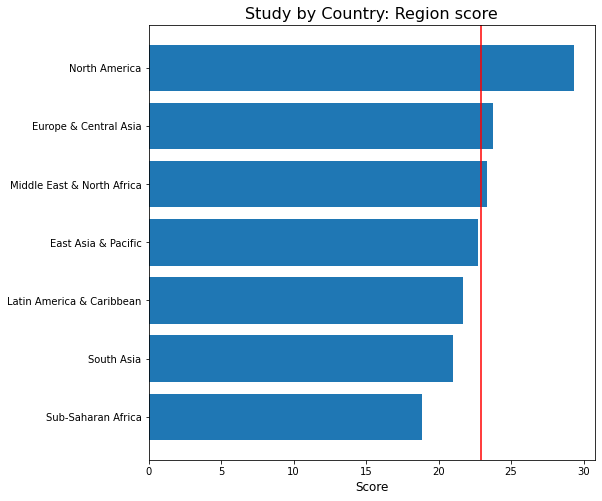

In [45]:
for pays in df_pays_score["Country Name"].unique():
#     print(pays)
    df_pays_score.loc[df_pays_score[df_pays_score["Country Name"]==pays].index, "Score"] = score_that_country_please_zero(df_1[df_1["Country Name"]==pays], l_temp, l_int, 1,0,1)

#On affiche la scorelist avec les meilleurs scores en premier
df_pays_score=df_pays_score.sort_values(by="Score", ascending=False)
df_pays_score = df_pays_score[df_pays_score["Score"]>0]
mean_score = df_pays_score["Score"].mean()
df_2 = pd.merge(df_pays_score, df_1.iloc[:,[0,2]] ,left_on="Country Name", right_on="Country Name", how="left")
df_2 = df_2.drop_duplicates()

l = pd.to_numeric(df_2["Score"]).groupby(df_2["Region"]).mean().sort_values(ascending=False)
#print(l)
#et pourquoi pas en faire un petit graphique
print("\n")
l = l.sort_values(ascending = True)
mean_score = l.mean()
print("mean = "+str(mean_score))
plt.figure(figsize=(8,8))
plt.title("Study by Country: Region score", fontdict={'size':16})
# plt.ylabel("Region", fontdict={'size':16})
plt.xlabel("Score", fontdict={'size':12})
# plt.xticks(rotation=90)
plt.axvline(x=mean_score, color='r')
plt.barh(l.index, l.values)
plt.savefig("graphe score study country", bbox_inches='tight')



mean = 22.958515520599573


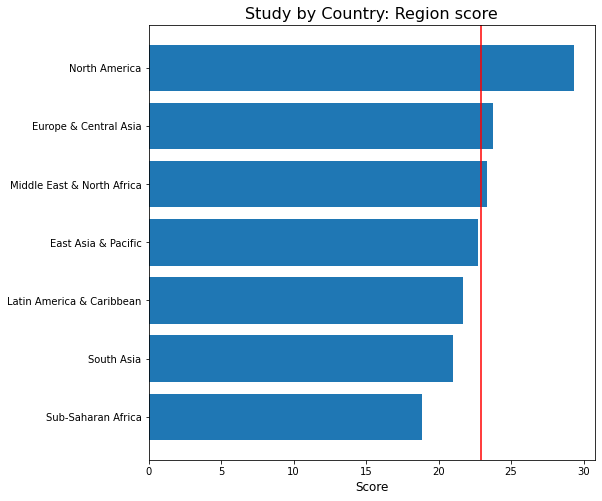

In [46]:
for pays in df_pays_score["Country Name"].unique():
#     print(pays)
    df_pays_score.loc[df_pays_score[df_pays_score["Country Name"]==pays].index, "Score"] = score_that_country_please_zero(df_1[df_1["Country Name"]==pays], l_temp, l_int, 1,1,0)

#On affiche la scorelist avec les meilleurs scores en premier
df_pays_score=df_pays_score.sort_values(by="Score", ascending=False)
df_pays_score = df_pays_score[df_pays_score["Score"]>0]
mean_score = df_pays_score["Score"].mean()
df_2 = pd.merge(df_pays_score, df_1.iloc[:,[0,2]] ,left_on="Country Name", right_on="Country Name", how="left")
df_2 = df_2.drop_duplicates()

l = pd.to_numeric(df_2["Score"]).groupby(df_2["Region"]).mean().sort_values(ascending=False)
#print(l)
#et pourquoi pas en faire un petit graphique
print("\n")
l = l.sort_values(ascending = True)
mean_score = l.mean()
print("mean = "+str(mean_score))
plt.figure(figsize=(8,8))
plt.title("Study by Country: Region score", fontdict={'size':16})
# plt.ylabel("Region", fontdict={'size':16})
plt.xlabel("Score", fontdict={'size':12})
# plt.xticks(rotation=90)
plt.axvline(x=mean_score, color='r')
plt.barh(l.index, l.values)
plt.savefig("graphe score study country", bbox_inches='tight')

# Remarque après modification de l'impact sur les classement de PEG

On modifie l'algo pour avoir vérifier l'impact sur le classement:
Lorsqu'on a pas de donnée pour l'indicateur P, E, ou G, on attribue un 0 ce qui va automatiquement établir le score à 0.
Plutôt que d'avoir P, E, ou G, établi à 1, étant plus permissif sur le manque de données

## Observation
Le top classement final par région ne change pas. 
Seul le nombre de régions présentées change.
Le modèle est plutôt robuste (sur le top classement).

In [ ]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(data_fin.T, alpha=0.2, figsize=(6, 6), diagonal='kde')

# Conclusion:

Mon étude est vraiment naïve, je choisis empiriquement des variables qui correspondent à l'étude que je voulais faire.<br/>
Chance ou non elles sont plutôt bien remplies et pour pas mal de régions.<br/>
Néanmoins si je devais faire une étude exploratoire plus poussée j'appliquerais un certain nombre de règles qui m'ont manquées par manque de connaissance:<br/>
_Diviser pour mieux régner: Une mini étude par région avec des fonctions communes<br/>
_Des indicateurs particuliers par régions: on peut le voir sur la première étude de la forme des données certaines variables ne sont dispos que pour certains pays etc. En gros j'ai choisi les indics puis vérifié qu'ils étaient corrects alors que j'aurais du vérifier qui était correct puis les étudier.<br/>
_Mieux organiser mon notebook: c'était plus ou moins la première fois que j'utilisais notebook jupyter et maintenant je vois mieux comment l'organiser.<br/>

Au final l'approche naïve n'est pas la plus mauvaise mais je pense que je devrais être plus paufiner l'approcher en général (une étude par région, indicateurs particuliers par étude, bien retirer les pays inutiles ou sans data, etc)
Affiner le nettoyage, retirer les pays où je n'ai pas les indicateurs suffisantes ou faire la moyenne
